<a href="https://colab.research.google.com/github/phanng0605/SC_1015_Data_Science/blob/main/Miniproject_A132_Team6_SC1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SC1015 - Group 3

**Name**: PHAN NGUYEN <br>
**Name**: QIANG ZHIQIN <br>
**Name**: RACHEL PHUAR YI LING <br>

# Problem: <br>

When producing a film, certain factors can be controlled by the producer, such as the budget, director, genre, and cast. These factors are referred to as pre-production elements. Producers typically aim for their films to be successful, with success being measured by outcomes like revenue, popularity, and ratings, which are known as post-production elements. Among these, revenue is often the most important consideration for a producer.

Our question at hand is:

> Can a producer predict a film's success before its release? Does a higher investment necessarily lead to more revenue? <br>
> Once a film is released and receives feedback from viewers, does this information improve the accuracy of success predictions? <br>
> Bonus : a recommendation system could be developed based on content. <br>

## 1. Import significant modules 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV

## 2. Import the two datasets for analysis

In [ ]:
credits = pd.read_csv("tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
print("Number of records:", len(credits['movie_id']))

Number of records: 4803


### Summary: <br>
>**movie_id** : id of the movie <br>
>**title** : title of the movie <br>
>**cast** :  information of cast in the movie <br>
>**crew** :  information of cast in the movie <br>
> There are 4803 records

In [ ]:
moviesdata = pd.read_csv("tmdb_5000_movies.csv")
moviesdata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
moviesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
print("Number of records:", len(moviesdata['title']))

Number of records: 4803


### Summary: <br>
> **Budget** : company's budget <br>
> **genres** : genres of the movie <br>
> **homepage** : link to the homepage <br>
> **id** : movie id <br>
> **keywords** : keywords of the data <br>
> **original_language** : shows the original language of the movie <br>
> **original_title** : original title of the movie <br>
> **overview** : movie overview <br>
> **popularity** : popularity rate of the movie <br>
> **production_companies**  production company name <br>
> **production_countries** :production countries names <br>
> **release_date** : date of release <br>
> **revenue** : movie's revenue <br>
> **runtime** : runtime of the movie <br>
> **spoken_languages** : list of spoken languages <br>
> **status** : status of the movie (ex. released) <br>
> **tagline** : tagline of the movie <br>
> **vote_average** : average of vote grade <br>
> **vote_count** : number of votes <br>
There are 4803 records

## 3. Merging the 2 datasets

+ Merging 2 datasets can improve comparing accuracy the variables across the datasets. 
+ Identifying patterns or relationships that may not be apparent when looking at each dataset individually. 
+ Filling in missing values or correct errors to improve the accuracy of the analysis.

In [ ]:
moviesdata = moviesdata.merge(credits, on='title')

In [ ]:
moviesdata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Summary of moviesdata after merging: <br>
> **Budget** : budget of the company <br>
> **genres** : show genres of the movie <br>
> **homepage** : link to the homepage <br>
> **id** : id of the movie <br>
> **keywords** : show keywords of the data <br>
> **original_language** : show the language of the movie <br>
> **original_title** : original title of the movie <br>
> **overview** : overview of the movie <br>
> **popularity** : popularity rate of the movie <br>
> **production_companies** : name of production company <br>
> **production_countries** : name of production countries <br>
> **release_date** : date of release <br>
> **revenue** : revenue of the movie <br>
> **runtime** : runtime of the movie <br>
> **spoken_languages** : list of spoken language <br>
> **status** : status of the movie (ex. released) <br>
> **tagline** : tagline of the movie <br>
>**title** : title of the movie <br>
> **vote_average** : average of vote grade <br>
> **vote_count** : number of vote <br>
> **movie_id** : id of the movie <br>
> **cast** :  information of cast in the movie <br>
>**crew** :  information of cast in the movie <br>
> There are 4803 records

### 4. Data extraction, curation, preparation and cleaning 

### Data extraction

#### Check the number of missing value in this dataset

In [ ]:
for item in moviesdata:
    print("Number of missing value in ", item, ": ", moviesdata[item].isna().sum())

Number of missing value in  budget :  0
Number of missing value in  genres :  0
Number of missing value in  homepage :  3096
Number of missing value in  id :  0
Number of missing value in  keywords :  0
Number of missing value in  original_language :  0
Number of missing value in  original_title :  0
Number of missing value in  overview :  3
Number of missing value in  popularity :  0
Number of missing value in  production_companies :  0
Number of missing value in  production_countries :  0
Number of missing value in  release_date :  1
Number of missing value in  revenue :  0
Number of missing value in  runtime :  2
Number of missing value in  spoken_languages :  0
Number of missing value in  status :  0
Number of missing value in  tagline :  844
Number of missing value in  title :  0
Number of missing value in  vote_average :  0
Number of missing value in  vote_count :  0
Number of missing value in  movie_id :  0
Number of missing value in  cast :  0
Number of missing value in  crew :

We can observe that the homepage, overview, runtime and tagline have missing values but they are not important factors to predicting the success of the movie.
Thus, we can fill in the missing values with default values

In [ ]:
moviesdata['homepage'] = moviesdata['homepage'].fillna('')
moviesdata['overview'] = moviesdata['overview'].fillna('')
moviesdata['release_date'] = moviesdata['release_date'].fillna('')
moviesdata['runtime'] = moviesdata['runtime'].fillna(0)
moviesdata['tagline'] = moviesdata['tagline'].fillna('')

#### Extract columns

In [ ]:
id = moviesdata['movie_id']
title = moviesdata['title']
cast = moviesdata['cast']
crew = moviesdata['crew']

We will explore some specific columns|

In [ ]:
id[1]

285

In [ ]:
title[1]

"Pirates of the Caribbean: At World's End"

In [ ]:
#Display the dictionary of cast
cast[1]

'[{"cast_id": 4, "character": "Captain Jack Sparrow", "credit_id": "52fe4232c3a36847f800b50d", "gender": 2, "id": 85, "name": "Johnny Depp", "order": 0}, {"cast_id": 5, "character": "Will Turner", "credit_id": "52fe4232c3a36847f800b511", "gender": 2, "id": 114, "name": "Orlando Bloom", "order": 1}, {"cast_id": 6, "character": "Elizabeth Swann", "credit_id": "52fe4232c3a36847f800b515", "gender": 1, "id": 116, "name": "Keira Knightley", "order": 2}, {"cast_id": 12, "character": "William \\"Bootstrap Bill\\" Turner", "credit_id": "52fe4232c3a36847f800b52d", "gender": 2, "id": 1640, "name": "Stellan Skarsg\\u00e5rd", "order": 3}, {"cast_id": 10, "character": "Captain Sao Feng", "credit_id": "52fe4232c3a36847f800b525", "gender": 2, "id": 1619, "name": "Chow Yun-fat", "order": 4}, {"cast_id": 9, "character": "Captain Davy Jones", "credit_id": "52fe4232c3a36847f800b521", "gender": 2, "id": 2440, "name": "Bill Nighy", "order": 5}, {"cast_id": 7, "character": "Captain Hector Barbossa", "credit_

In [ ]:
#Display the dictionary of crew
crew[1]

'[{"credit_id": "52fe4232c3a36847f800b579", "department": "Camera", "gender": 2, "id": 120, "job": "Director of Photography", "name": "Dariusz Wolski"}, {"credit_id": "52fe4232c3a36847f800b4fd", "department": "Directing", "gender": 2, "id": 1704, "job": "Director", "name": "Gore Verbinski"}, {"credit_id": "52fe4232c3a36847f800b54f", "department": "Production", "gender": 2, "id": 770, "job": "Producer", "name": "Jerry Bruckheimer"}, {"credit_id": "52fe4232c3a36847f800b503", "department": "Writing", "gender": 2, "id": 1705, "job": "Screenplay", "name": "Ted Elliott"}, {"credit_id": "52fe4232c3a36847f800b509", "department": "Writing", "gender": 2, "id": 1706, "job": "Screenplay", "name": "Terry Rossio"}, {"credit_id": "52fe4232c3a36847f800b57f", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "52fe4232c3a36847f800b585", "department": "Editing", "gender": 2, "id": 1722, "job": "Editor", "name": "Craig Wood"}, {"credit_id": "52f

The cast and crew columns are very complicated string-based dictionaires with many keys for each record, most of them are string. Therefore, we will extract the number of cast and crew in each movie as num_cast and num_crew columns as potential features to predict revenue.</br>

#### Extract from cast column


In [ ]:
num_cast = []
for i in range(len(cast)):
    temp = eval(cast[i]) #Convert to list of real dictionaries
    num_cast.append(len(temp)) # Append the number of cast to the list
print(num_cast[0]) #Test for number of cast in the first film
print("Length of num_cast column", len(num_cast))

83
Length of num_cast column 4809


We do the similar extraction with crew factor

In [ ]:
num_crew = []
for i in range(len(crew)):
    temp = eval(crew[i]) #Convert the sting-based dictionaries to list of real dictionaries
    num_crew.append(len(temp)) # Append the number of cast to the list
print(num_crew[0]) #number of crew in the first film
print("Length of num_crew column:", len(num_crew))

153
Length of num_crew column: 4809


#### Summary: <br>
From the dataset, we have 4 variales: <br>
***- movie_id***<br>
***- title***<br>
***- num_cast***: Used for regression model<br>
***- num_crew***: Used for regression model<br>
with 4803 record.
****

### Extract the data from movies dataset

#### Extract the columns of the table

In [ ]:
budget = moviesdata['budget']
genres = moviesdata['genres']
# homepage: We ignore this variable cause it does not contribute anything to the prediction
# id: We have the id from the credit dataset
keywords = moviesdata['keywords']
original_language = moviesdata['original_language']
original_title = moviesdata['original_title']
popularity = moviesdata['popularity']
prod_companies = moviesdata['production_companies']
prod_countries = moviesdata['production_countries']
release_date = moviesdata['release_date']
revenue = moviesdata['revenue']
runtime = moviesdata['runtime']
spoken_languages = moviesdata['spoken_languages']
status = moviesdata['status']
tagline = moviesdata['tagline']
# title: already from the credit dataset
vote_average = moviesdata['vote_average']
vote_count = moviesdata['vote_count']

#### Count the number of genres and the list of genres for each movies

In this part, we extract the number of genres, as a possible features for predicting revenue. Also, we extract 3 first genres, lower case them and remove space for recommendation later.

In [ ]:
genres[0] #explore first element in genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
num_genres = []
name_genres = []
for i in range(len(genres)):
    temp = eval(genres[i])
    num_genres.append(len(temp))
    temp_name = []
    count = 0
    for ge in temp:
        if count<4:
            count = count+1
            temp_name.append(str.lower(ge['name'].replace(" ","")))
    name_genres.append(temp_name)
print(num_genres[0])
print(name_genres[0])

4
['action', 'adventure', 'fantasy', 'sciencefiction']


In [ ]:
genres_list = set()
for na in name_genres:
    for n in na:
        genres_list.add(n)
genres_list = list(genres_list)
genres_list

['adventure',
 'horror',
 'comedy',
 'documentary',
 'music',
 'romance',
 'drama',
 'family',
 'sciencefiction',
 'foreign',
 'crime',
 'mystery',
 'tvmovie',
 'history',
 'animation',
 'thriller',
 'war',
 'western',
 'fantasy',
 'action']

#### Transform this categorical variable in to one-hot encoding

In [ ]:
genres_d = pd.DataFrame()
for genres in genres_list:
    temp = []
    for i in range(len(name_genres)):
        temp.append(1 if genres in name_genres[i] else 0)
    genres_d[genres] = pd.Series(temp).values
    moviesdata[genres] = pd.Series(temp).values

In [ ]:
genres_d.head()

,adventure,horror,comedy,documentary,music,romance,drama,family,sciencefiction,foreign,crime,mystery,tvmovie,history,animation,thriller,war,western,fantasy,action
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Now we have the new moviesdata set that has one-hot encoding representation of genres

In [ ]:
moviesdata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,crime,mystery,tvmovie,history,animation,thriller,war,western,fantasy,action
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,1,1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,1,1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,1,0,0,0,0,0,0,0,0,1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1,0,0,0,0,1,0,0,0,1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,0,0,0,1


In [ ]:
moviesdata[genres]

0       1
1       1
2       1
3       1
4       1
       ..
4804    1
4805    0
4806    0
4807    0
4808    0
Name: action, Length: 4809, dtype: int64

#### Extract the keywords

In [ ]:
num_keywords = []
name_keywords = []
for i in range(len(keywords)):
    temp = eval(keywords[i])
    num_keywords.append(len(temp))
    temp_name = []
    count = 0
    for key in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(key['name'].replace(" ","")))
    name_keywords.append(temp_name)
print(num_keywords[0])
print(name_keywords[0])

21
['cultureclash', 'future', 'spacewar']


#### Convert all features to dataframe

In [ ]:
num_cast_d = pd.DataFrame(num_cast)
num_crew_d = pd.DataFrame(num_crew)
budget_d = pd.DataFrame(budget)
num_genres_d = pd.DataFrame(num_genres)
num_keywords_d = pd.DataFrame(num_keywords)
popularity_d = pd.DataFrame(popularity)
runtime_d = pd.DataFrame(runtime)
vote_average_d = pd.DataFrame(vote_average)
vote_count_d = pd.DataFrame(vote_count)
revenue_d = pd.DataFrame(revenue)


### Normalize the distribution of the variables by using log scale and remove outliers

In [ ]:
data_o = pd.concat([revenue_d, budget_d, num_cast_d, num_crew_d, genres_d, popularity_d, vote_count_d, vote_average_d], axis = 1).reindex(budget_d.index)
data_o.columns = ['revenue', 'budget', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_o.shape

(4809, 27)

+ Normalize data first by scaling to a certain scale, which is [0,1] by dividing the data by its mean squared value

In [ ]:
from sklearn import preprocessing
data_o1 = data_o.copy() #copy of data_o
data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']] = preprocessing.normalize(data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']])

In [ ]:
data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]

,revenue,budget,popularity,vote_count,vote_average
0,0.996406,0.084703,5.376572e-08,0.000004,2.573248e-09
1,0.954568,0.297992,1.381518e-07,0.000004,6.853820e-09
2,0.963414,0.268018,1.174648e-07,0.000005,6.891885e-09
3,0.974464,0.224543,1.008766e-07,0.000008,6.826122e-09
4,0.737750,0.675074,1.140538e-07,0.000006,1.583828e-08
...,...,...,...,...,...
4804,0.994240,0.107174,6.951572e-06,0.000116,3.215210e-06
4805,0.000000,1.000000,7.139464e-05,0.000556,6.555553e-04
4806,0.000000,0.000000,1.547871e-01,0.642948,7.501059e-01
4807,0.000000,0.000000,9.451143e-02,0.771965,6.285999e-01




### Measure the skewness and kurtosis of data 

In [ ]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue         4.442112
budget          2.438385
popularity      9.721524
vote_count      3.823107
vote_average   -1.961065
dtype: float64

In [ ]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue          33.097489
budget            7.667528
popularity      192.078712
vote_count       19.914038
vote_average      7.803744
dtype: float64

In [ ]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]

,revenue,budget,popularity,vote_count,vote_average
0,2787965087,237000000,150.437577,11800,7.2
1,961000000,300000000,139.082615,4500,6.9
2,880674609,245000000,107.376788,4466,6.3
3,1084939099,250000000,112.312950,9106,7.6
4,284139100,260000000,43.926995,2124,6.1
...,...,...,...,...,...
4804,2040920,220000,14.269792,238,6.6
4805,0,9000,0.642552,5,5.9
4806,0,0,1.444476,6,7.0
4807,0,0,0.857008,7,5.7


### Plot the graphs for each of the variables

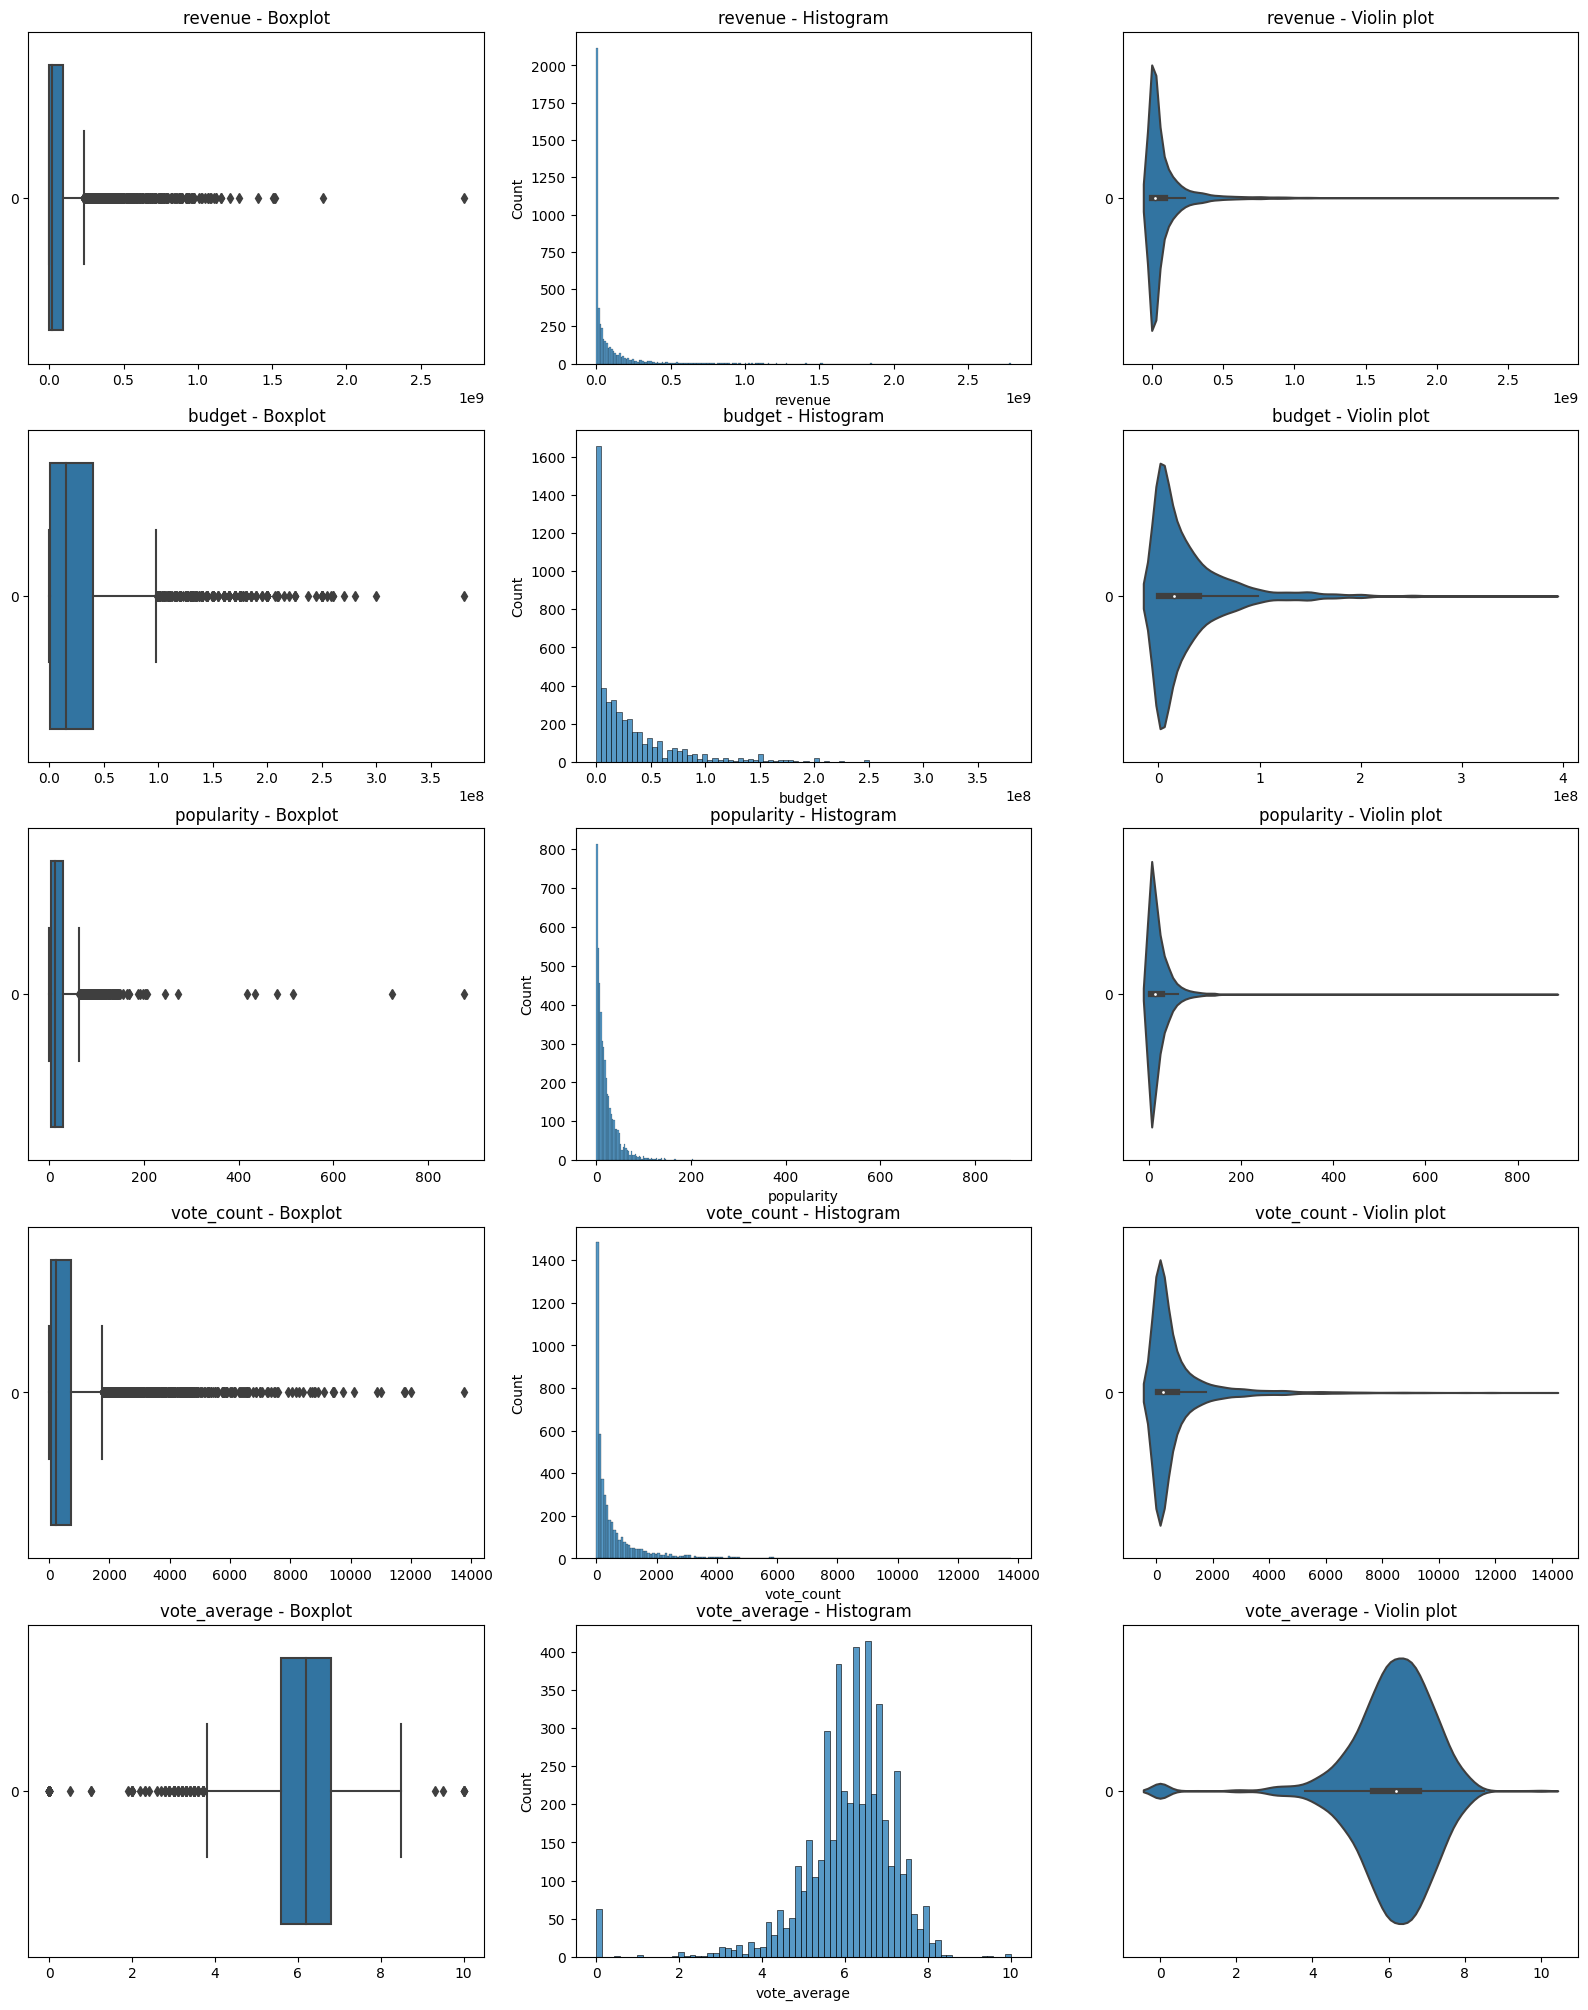

In [ ]:
f, axes = plt.subplots(5, 3, figsize=(20, 25))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_o[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_o[var], ax = axes[count,1])
    sb.violinplot(data_o[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(var + ' - Boxplot')
    axes[count,1].set_title(var + ' - Histogram')
    axes[count,2].set_title(var + ' - Violin plot')

    count += 1

We can see that the distribution of this data is positve skew. Therefore, we proceed to some normalization and cut the outlier to make it more uniform.

+ Normalize by using log function

In [ ]:
data_process = data_o
data_process.shape

(4809, 27)

We remove all records with '0' value, as when we transform to log scale (because log(0) will go to -infinity). 

In [ ]:
data_process = data_process[data_process['budget'] > 0]
data_process = data_process[data_process['revenue'] > 0]
data_process = data_process[data_process['vote_count'] > 0]
data_process = data_process[data_process['popularity'] > 0]
data_process.shape

(3230, 27)

#### Transform the dataset into log scale to make it more uniform

In [ ]:
budget_log = pd.DataFrame(np.log(data_process['budget']))
revenue_log = pd.DataFrame(np.log(data_process['revenue']))
popularity_log = pd.DataFrame(np.log(data_process['popularity']))
vote_count_log = pd.DataFrame(np.log(data_process['vote_count']))

In [ ]:
data_log = pd.concat([budget_log, revenue_log, num_cast_d, num_crew_d, genres_d, popularity_log, vote_count_log, vote_average_d], axis = 1).reindex(budget_log.index)
data_log.columns = ['budget', 'revenue', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_log.shape

(3230, 27)

Here, we use a function called ***zscore*** from stats in scipy. The function of this function is to to measure the distance of the point to mean over the standard deviation. If more than 3 times or the point lies out of 3 standard deviation, we cut that record. 

In [ ]:
data_log = data_log[(np.abs(stats.zscore(data_log['budget'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['revenue'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['popularity'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['vote_count'])) < 3)]
data_log.shape

(3100, 27)

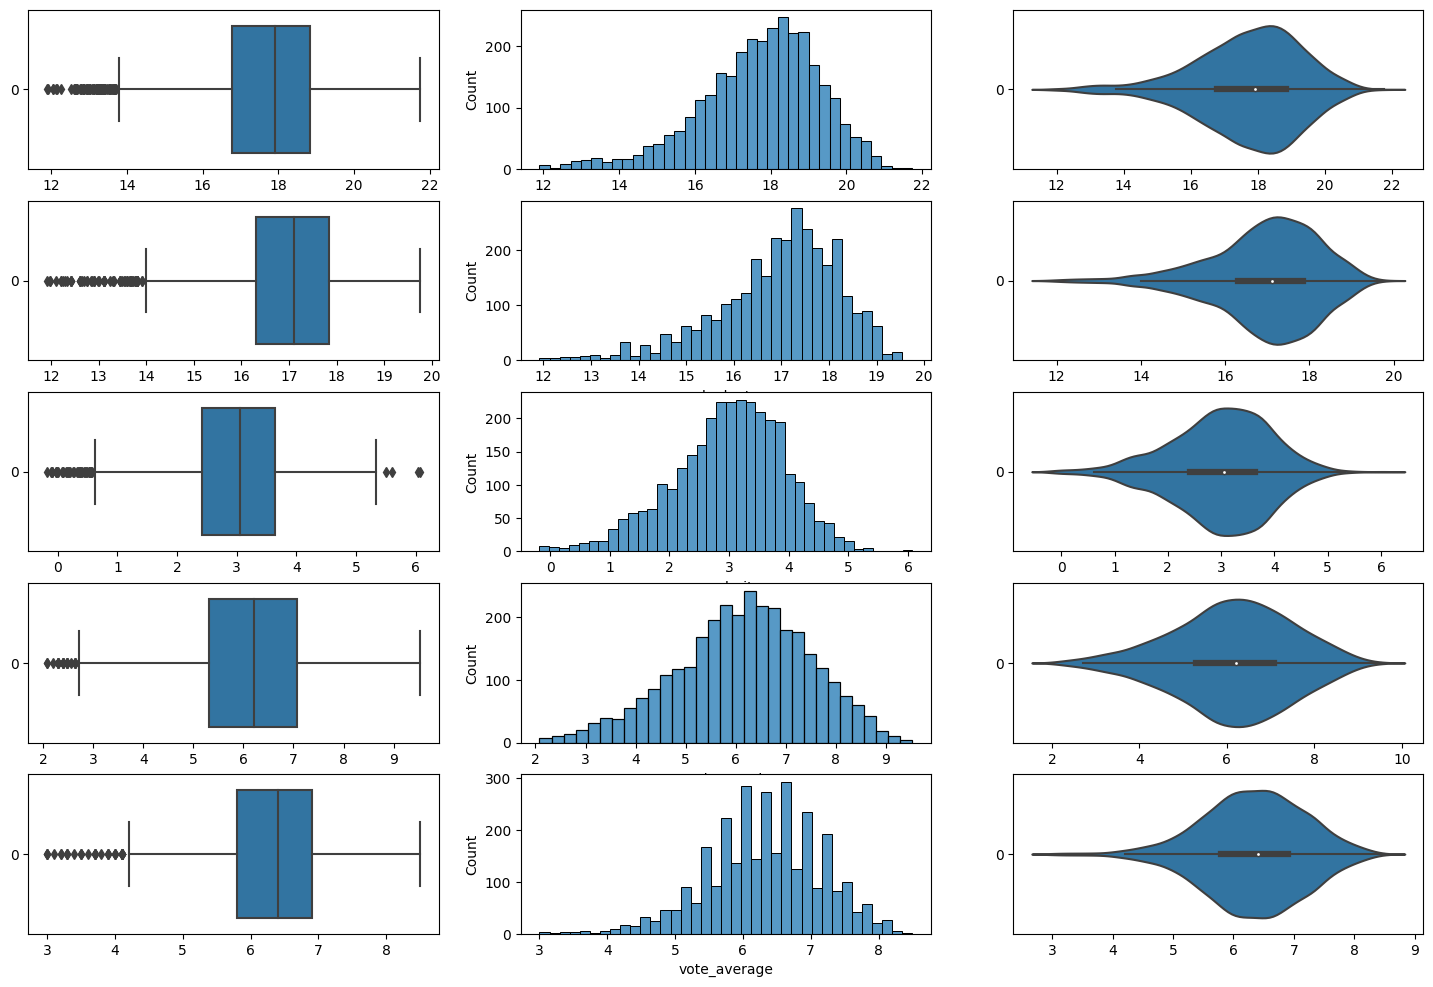

In [ ]:
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_log[var], ax = axes[count,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue        -0.678232
budget         -0.829586
popularity     -0.414438
vote_count     -0.287159
vote_average   -0.360412
dtype: float64

In [ ]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue         0.578514
budget          0.850353
popularity      0.196128
vote_count     -0.184214
vote_average    0.335789
dtype: float64

Now, our data is more uniform and less skewed.

## 5. Exploratory data analysis/visualization to gather relevant insights

In [ ]:
data_log.describe()

,budget,revenue,num_cast,num_crew,sciencefiction,action,western,comedy,mystery,war,...,drama,music,animation,fantasy,horror,foreign,thriller,popularity,vote_count,vote_average
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,...,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,16.950823,17.716700,26.573226,34.846129,0.207419,0.100645,0.341290,0.009032,0.031290,0.172258,...,0.045161,0.058065,0.278710,0.033226,0.015806,0.102581,0.289355,2.987727,6.133300,6.325903
std,1.270268,1.575329,21.662035,35.366078,0.405524,0.300907,0.474219,0.094623,0.174129,0.377666,...,0.207691,0.233903,0.448437,0.179255,0.124746,0.303459,0.453536,0.930901,1.343900,0.843885
min,11.918391,11.894112,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.784724,15.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.421539,5.303305,5.800000
50%,17.111347,17.910894,20.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.057103,6.212604,6.400000
75%,17.845287,18.832801,31.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.641061,7.077497,6.900000
max,19.755682,21.748578,224.000000,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.073686,9.528940,8.500000


### Explore statistics of essential variables

In [ ]:
data_log[['budget','revenue', 'num_cast', 'num_crew', 'popularity', 'vote_count', 'vote_average']].describe()

,budget,revenue,num_cast,num_crew,popularity,vote_count,vote_average
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,16.950823,17.716700,26.573226,34.846129,2.987727,6.133300,6.325903
std,1.270268,1.575329,21.662035,35.366078,0.930901,1.343900,0.843885
min,11.918391,11.894112,0.000000,1.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.784724,15.000000,12.000000,2.421539,5.303305,5.800000
50%,17.111347,17.910894,20.000000,21.000000,3.057103,6.212604,6.400000
75%,17.845287,18.832801,31.000000,45.000000,3.641061,7.077497,6.900000
max,19.755682,21.748578,224.000000,435.000000,6.073686,9.528940,8.500000


### Plot Revenue Variable

<Axes: >

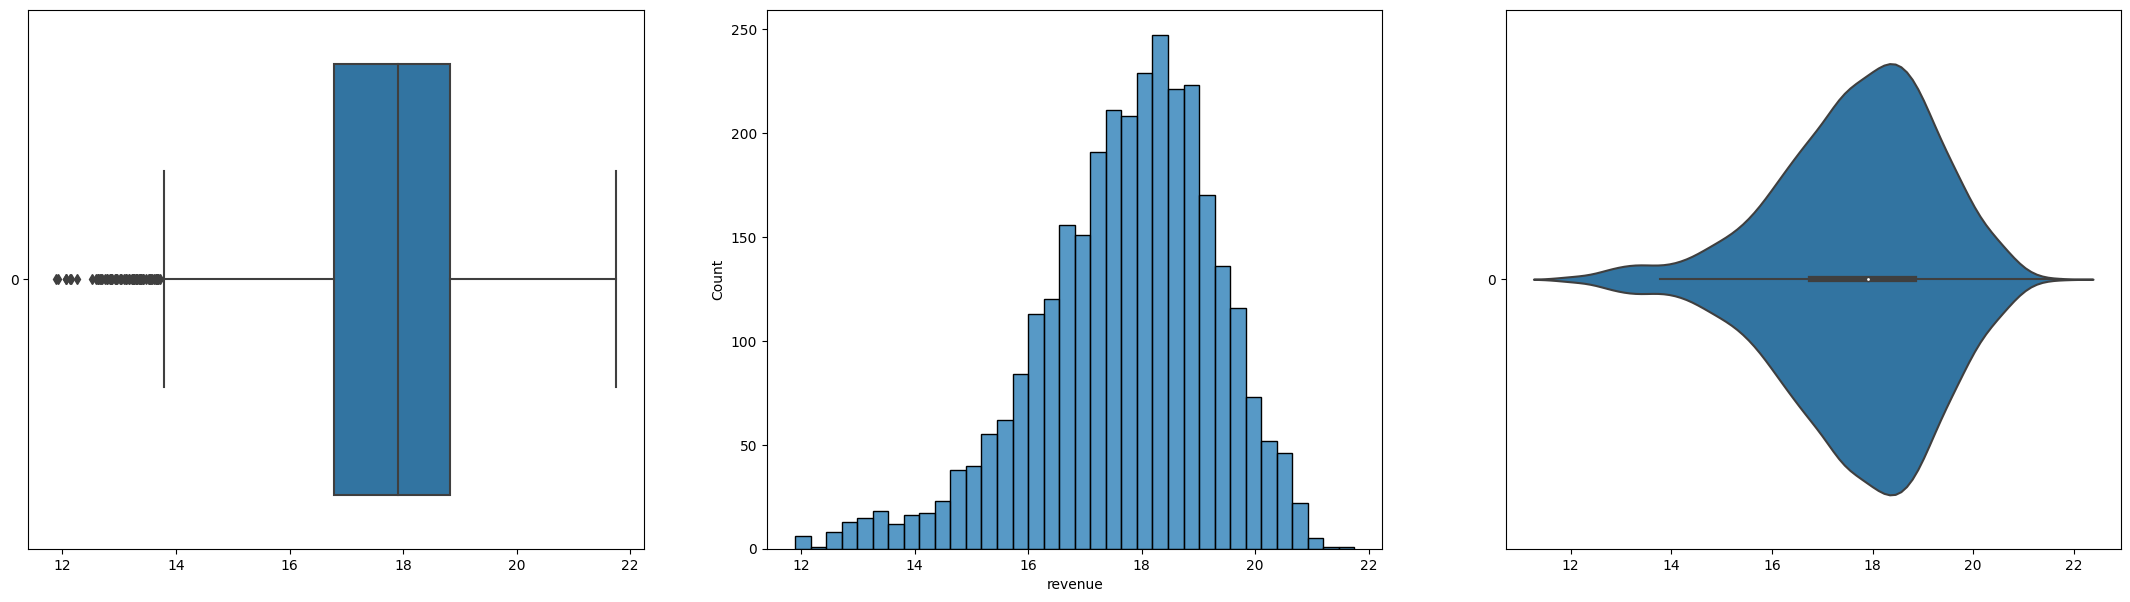

In [ ]:
f, axes = plt.subplots(1, 3, figsize =(27, 7))
sb.boxplot(data_log['revenue'], orient = "h", ax = axes[0])
sb.histplot(data_log['revenue'], ax = axes[1])
sb.violinplot(data_log['revenue'], orient = "h", ax = axes[2])

### Pre-production elements uni-varite analysis

Now, we have 4 pre-production elements: <br>
> **budget** <br>
> **num_cast**<br>
> **num_crew**<br>
> **genres**: 20 genres are used as 20 different features<br>

#### Budget, num_cast, num_crew

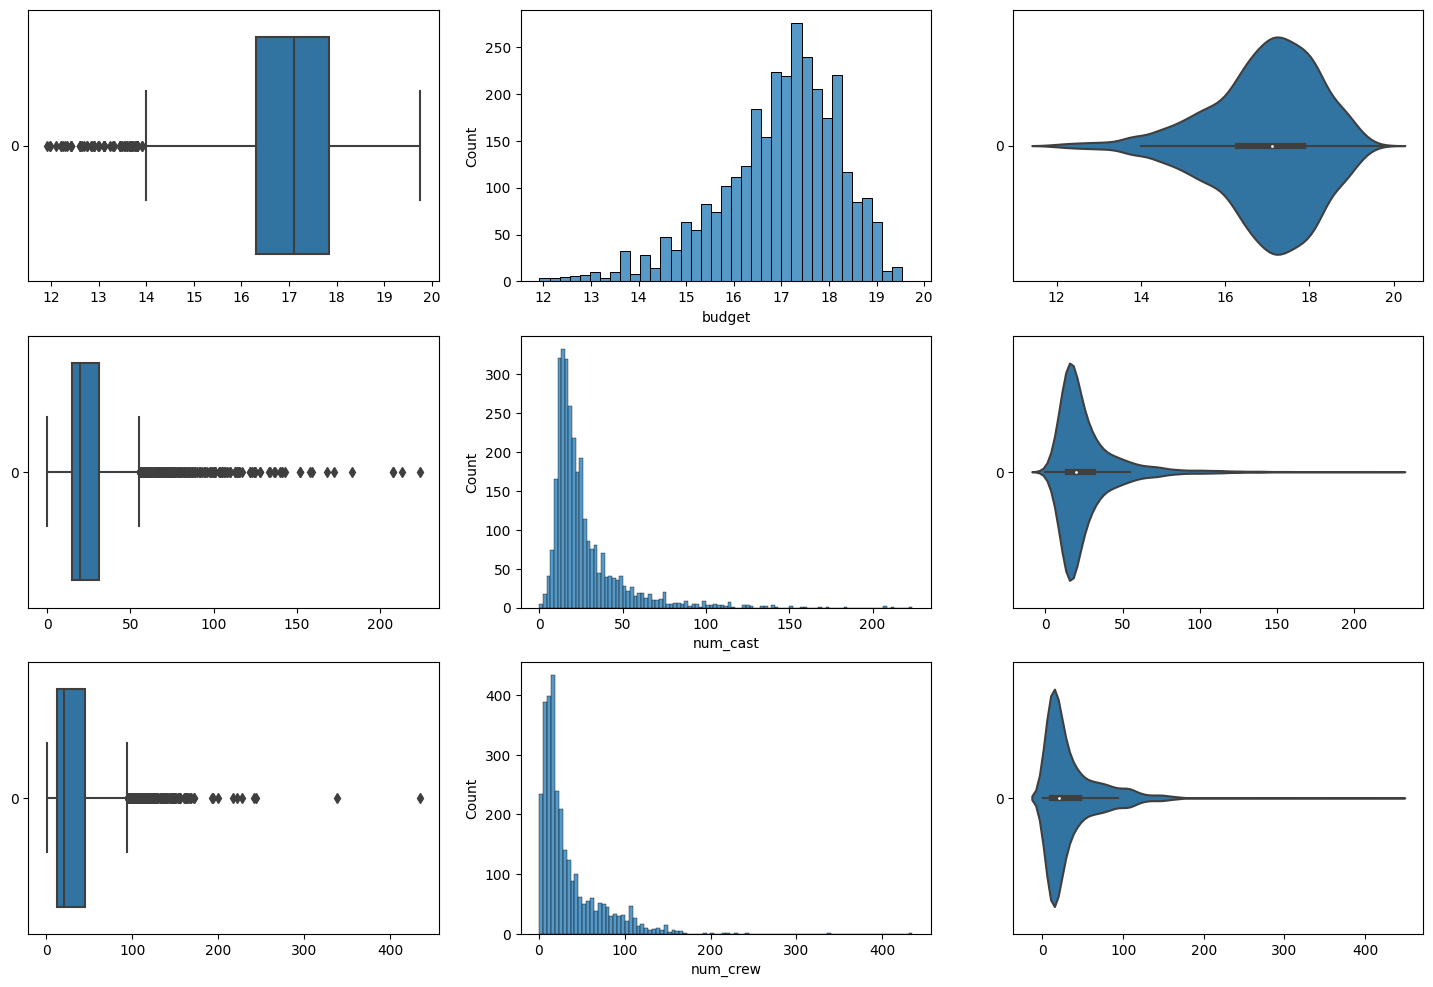

In [ ]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

pos = 0
for var in ['budget', 'num_cast', 'num_crew']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[pos,0])
    sb.histplot(data_log[var], ax = axes[pos,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[pos,2])
    pos += 1

#### Genres

In [ ]:
num_genres = data_log[genres_list].sum(axis = 0)
num_genres

adventure          390
horror              49
comedy              28
documentary       1363
music              180
romance              0
drama              140
family             245
sciencefiction     643
foreign            318
crime              500
mystery             97
tvmovie              0
history            335
animation          864
thriller           897
war                534
western           1058
fantasy            103
action             312
dtype: int64

Text(0, 0.5, 'Genres Count')

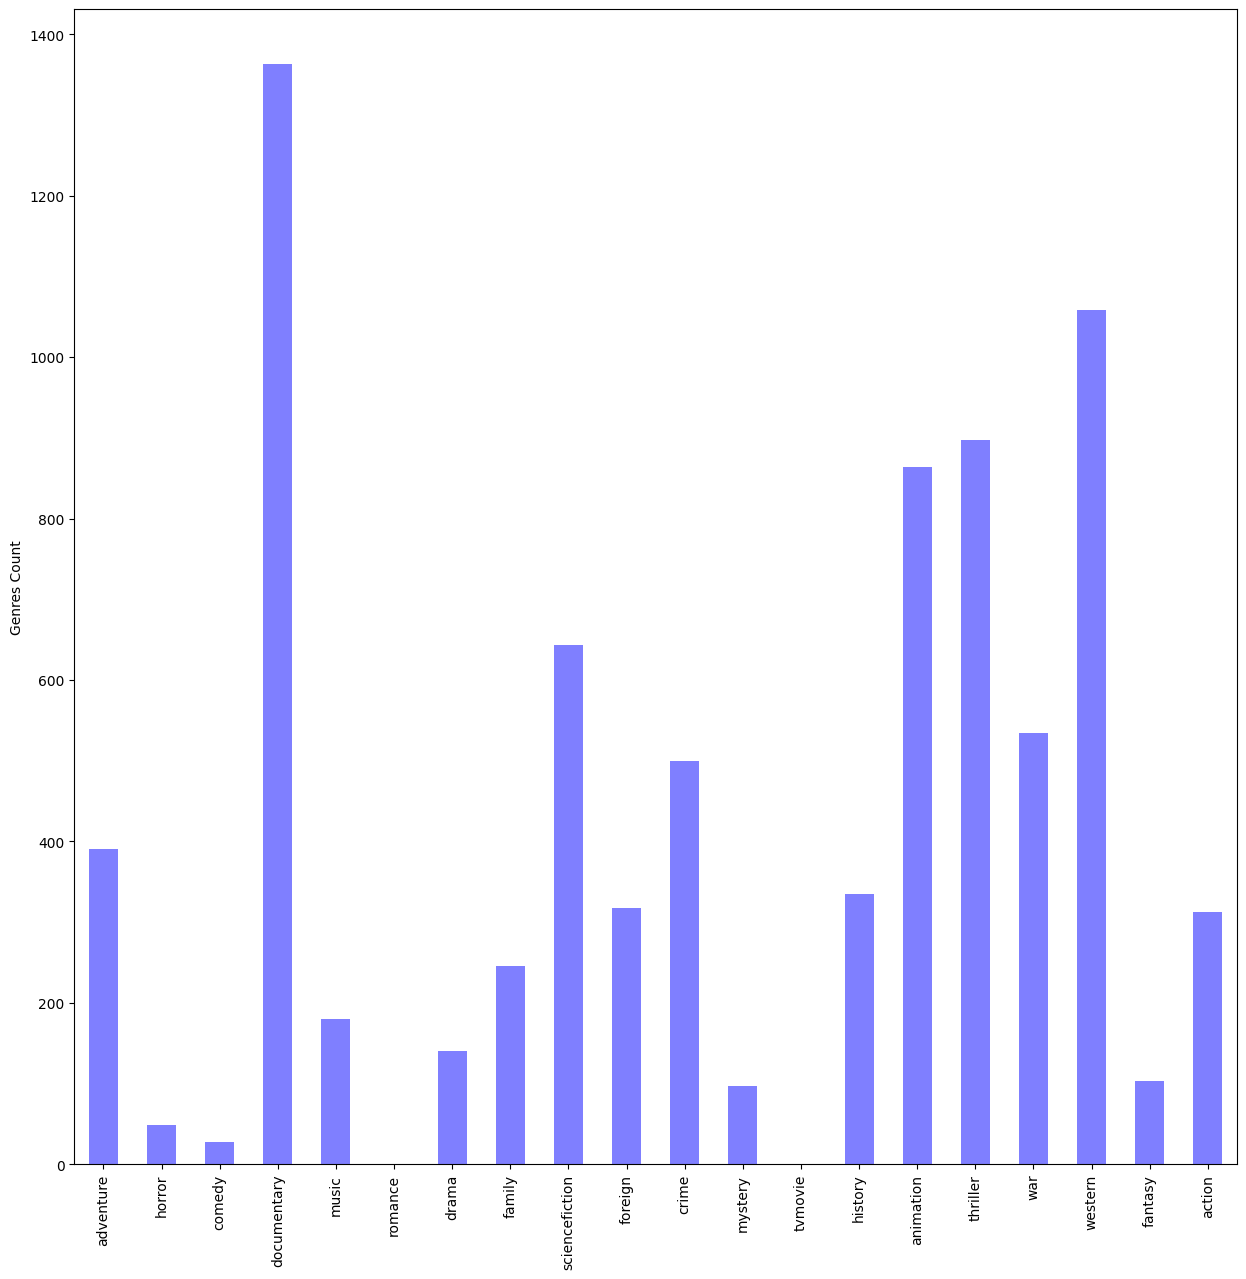

In [ ]:
plt.subplots(figsize=(15, 15))
num_genres.plot.bar(align='center', alpha=0.5, color='blue')
#y_pos = np.arange(num_genres)
#plt.xticks(y_pos, name_genres)
plt.ylabel('Genres Count')

## Post-production elements uni-variate analysis

We have 3 post-production elements: <br>
> **popularity** <br>
> **vote_count** <br>
> **vote_average** <br>

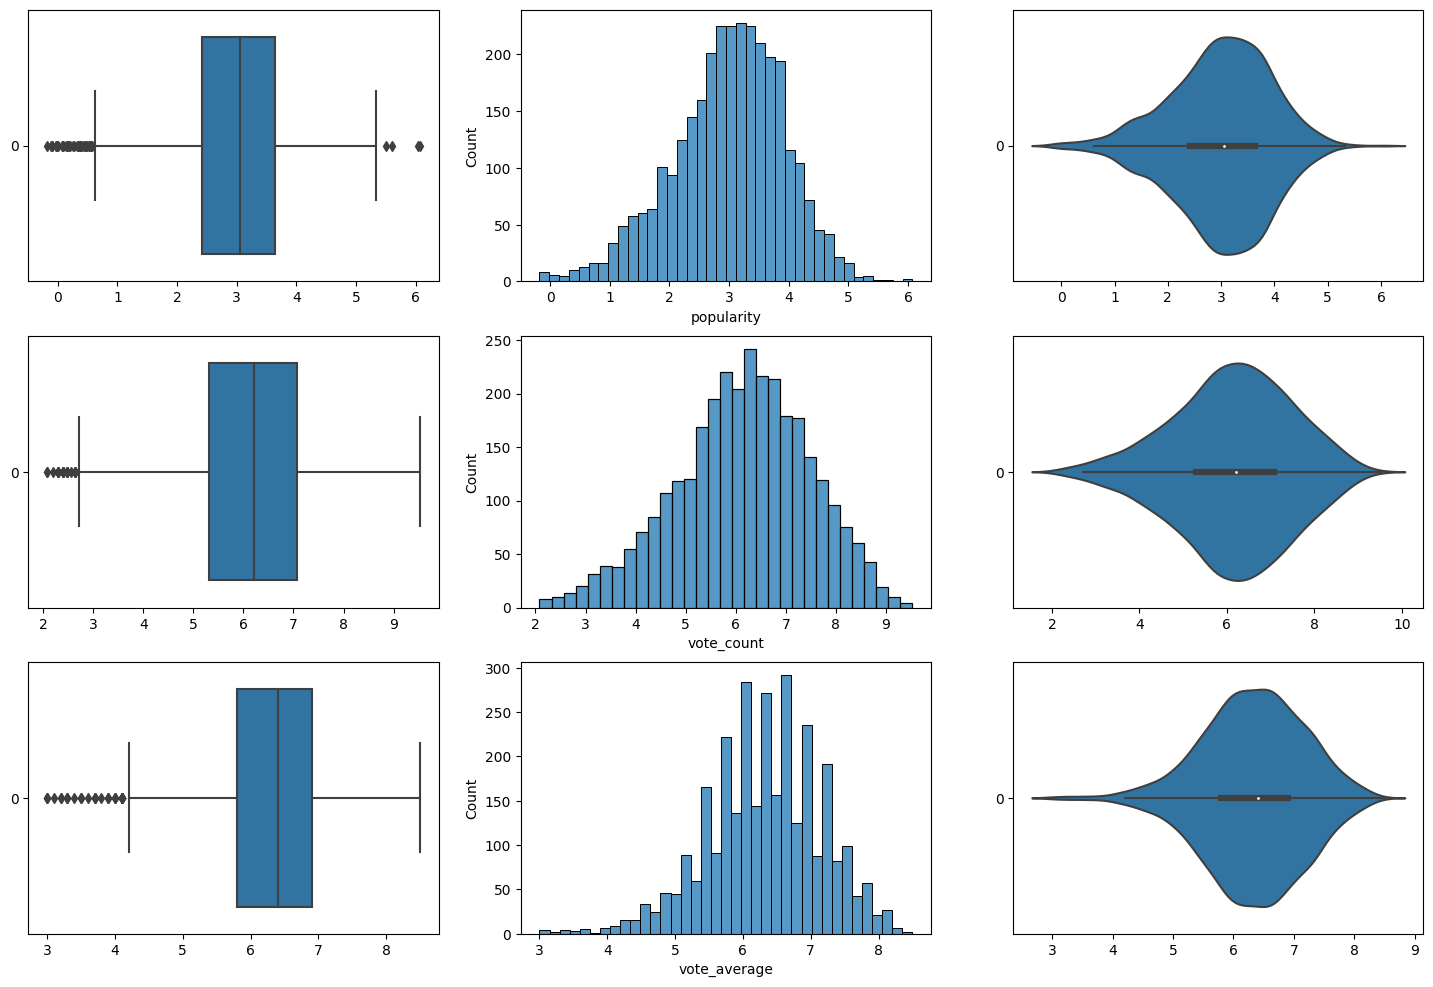

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(18, 12))

pos = 0
for var in ['popularity', 'vote_count', 'vote_average']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[pos,0])
    sb.histplot(data_log[var], ax = axes[pos,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[pos,2])
    pos += 1

### Multi-variate exploratory

In [ ]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

documentary      -0.203814
comedy           -0.084991
war              -0.072423
horror           -0.070343
action           -0.067070
crime            -0.057618
drama            -0.031282
mystery          -0.027223
western          -0.005469
family           -0.005327
fantasy          -0.003028
animation         0.009936
adventure         0.095573
vote_average      0.125474
thriller          0.161976
foreign           0.163064
music             0.169485
history           0.195995
sciencefiction    0.261552
num_cast          0.281805
num_crew          0.349295
budget            0.637824
popularity        0.651487
vote_count        0.707363
revenue           1.000000
romance                NaN
tvmovie                NaN
Name: revenue, dtype: float64

we can see that some pre-production elements that has a higher correlation to revenue is **budget, num_crew, num_cast**

In [ ]:
data_F = pd.DataFrame(data_log[['revenue', 'budget', 'num_crew', 'num_cast',]])

<Axes: >

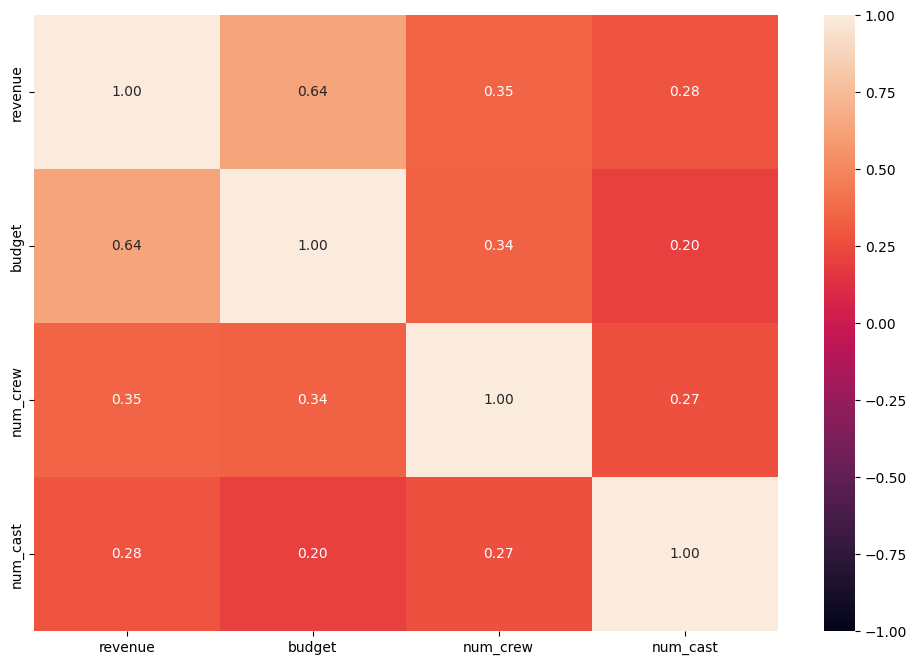

In [ ]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_F.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

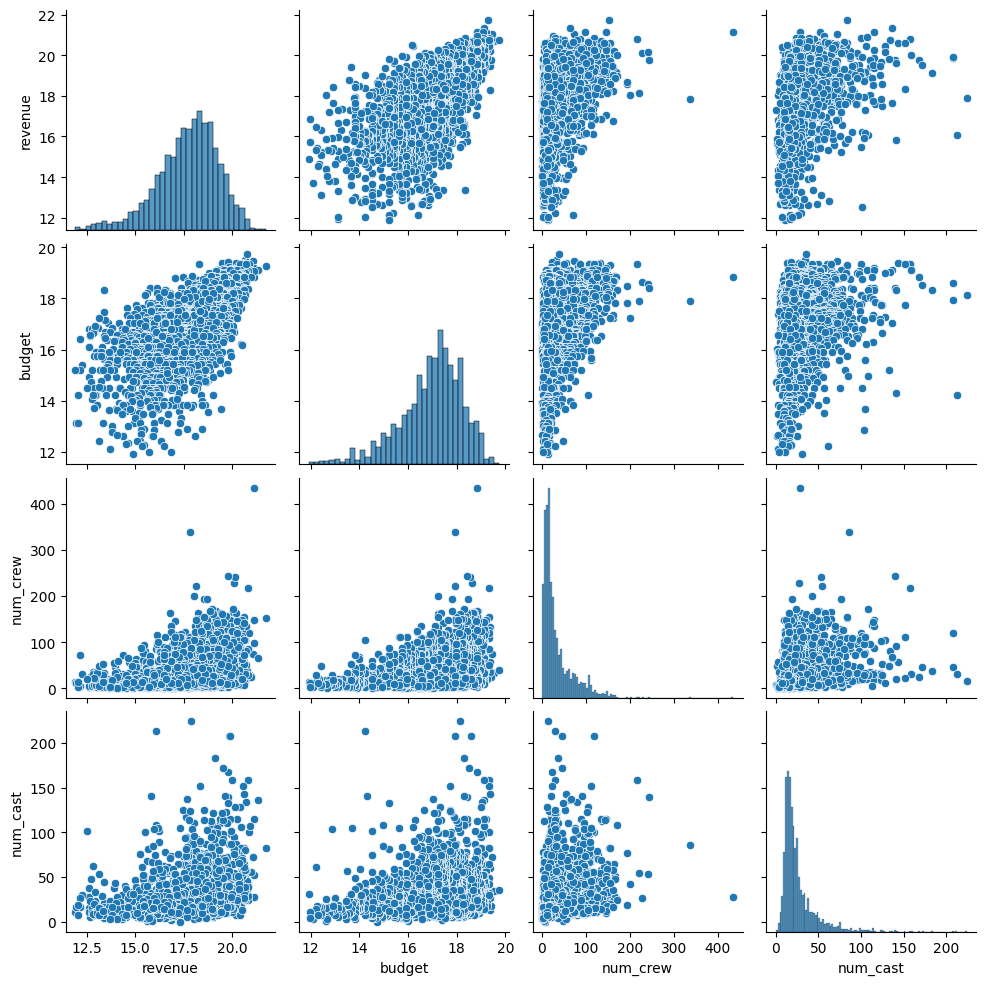

In [ ]:
sb.pairplot(data = data_F)

From the correlation matrix, there are some post-production elements that have high correlation such as **popularity, vote_count**

In [ ]:
data_P = pd.DataFrame(data_log[['revenue', 'popularity', 'vote_count']])

<Axes: >

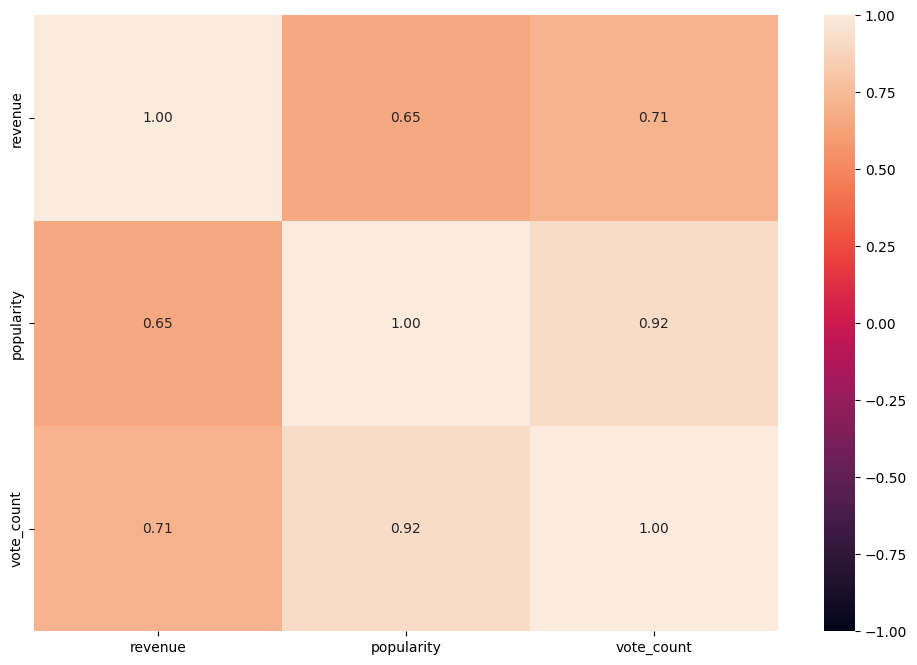

In [ ]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_P.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

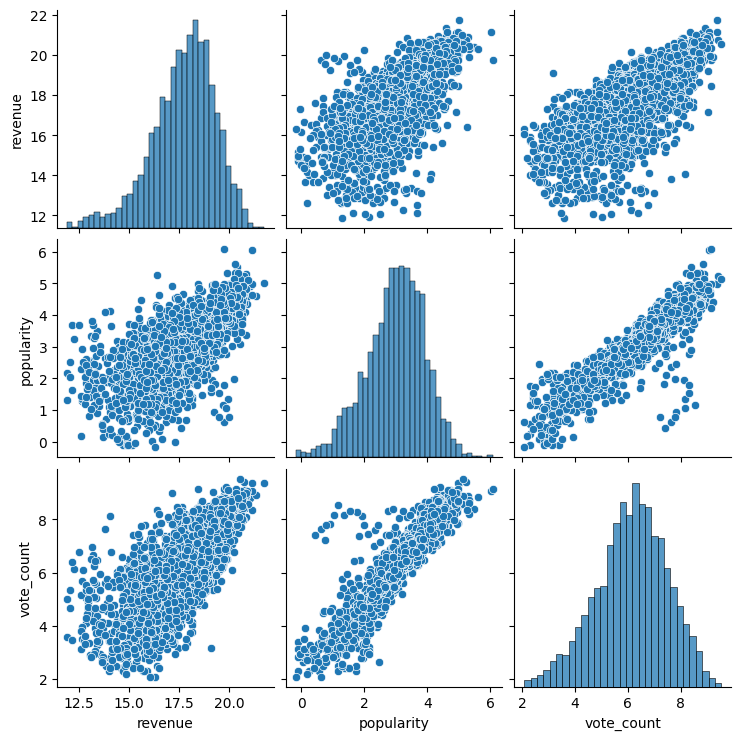

In [ ]:
sb.pairplot(data = data_P)

## 6. Building regression models:

Some note on data<br>
> **data_F**: preprocessed pre-production elements data frame <br>
> **data_P**: preprocessed post-production elements data frame <br>
> **data_log**: all elements

### Model 1: Linear regression model with pre-production elements using Linear Regression 

In [ ]:
#data_train = data_log.drop(['revenue'], axis = 1)
train, test = train_test_split(data_log, test_size = 0.25)

In [ ]:
X_train = pd.DataFrame(train[['revenue', 'budget', 'num_crew', 'num_cast']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'budget', 'num_crew', 'num_cast']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of train set: (2325, 3) (2325, 1)
Shape of test set: (775, 3) (775, 1)


In [ ]:
linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [5.07631696]
Coefficients of Regression 	: a =  [[0.72012497 0.00477129 0.00985847]]



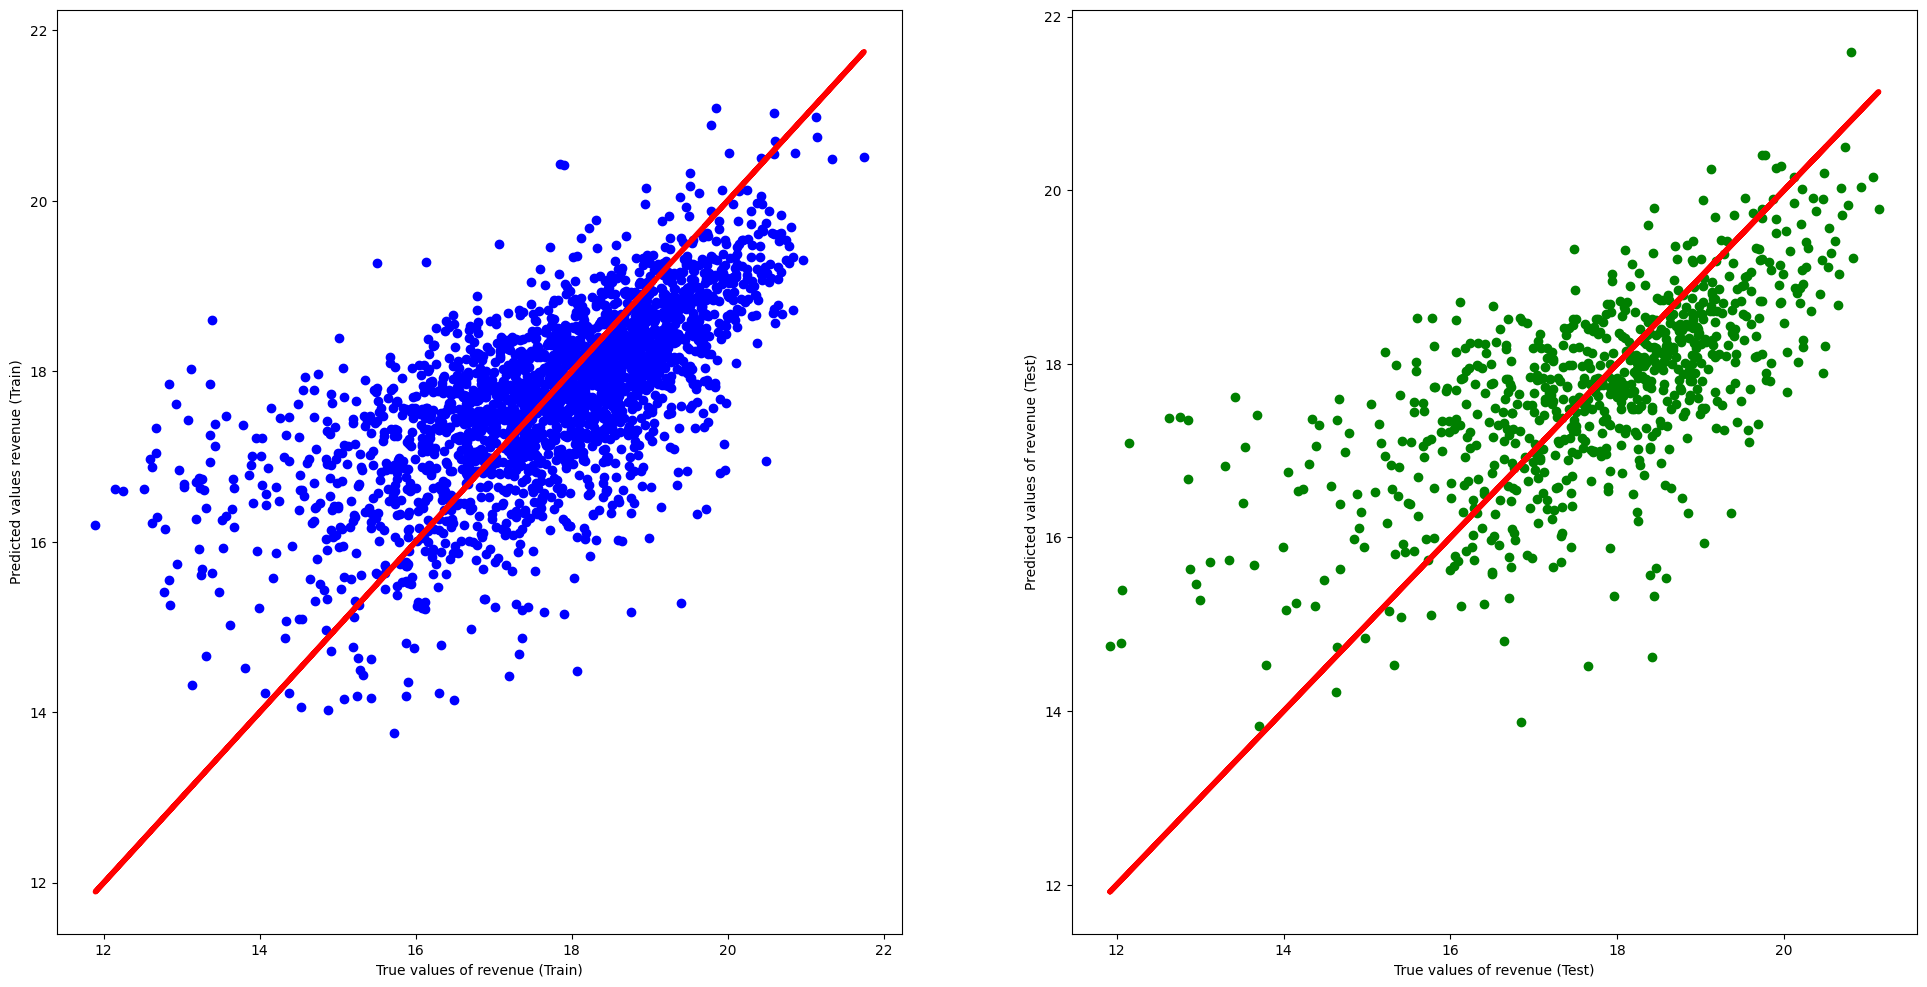

In [ ]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4433556114630096
Mean Squared Error (MSE) 	: 1.354955983071493

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44262774888073997
Mean Squared Error (MSE) 	: 1.4608688853249576



#### Some insights from budget
We can see that the performance is quite poor with low score. There are some correlation between budget and revenue but not very high. There is a trend in the data pattern, which means increase budget can also contribute to increase the revenue, but the formular (model) base on budget is not enough to predict the upcoming revenue.<br> 
The producer, in this case, can not just base on budget to predict there success. There should also be other factors that affect the revenue as well. <br>
Let's build a model with other pre-production elements to see if there is any improvement.

### Model 2: Regression model base on pre-production elements that producer can control using XgBoost

Shape of train set: (2325, 3) (2325, 1)
Shape of test set: (775, 3) (775, 1)


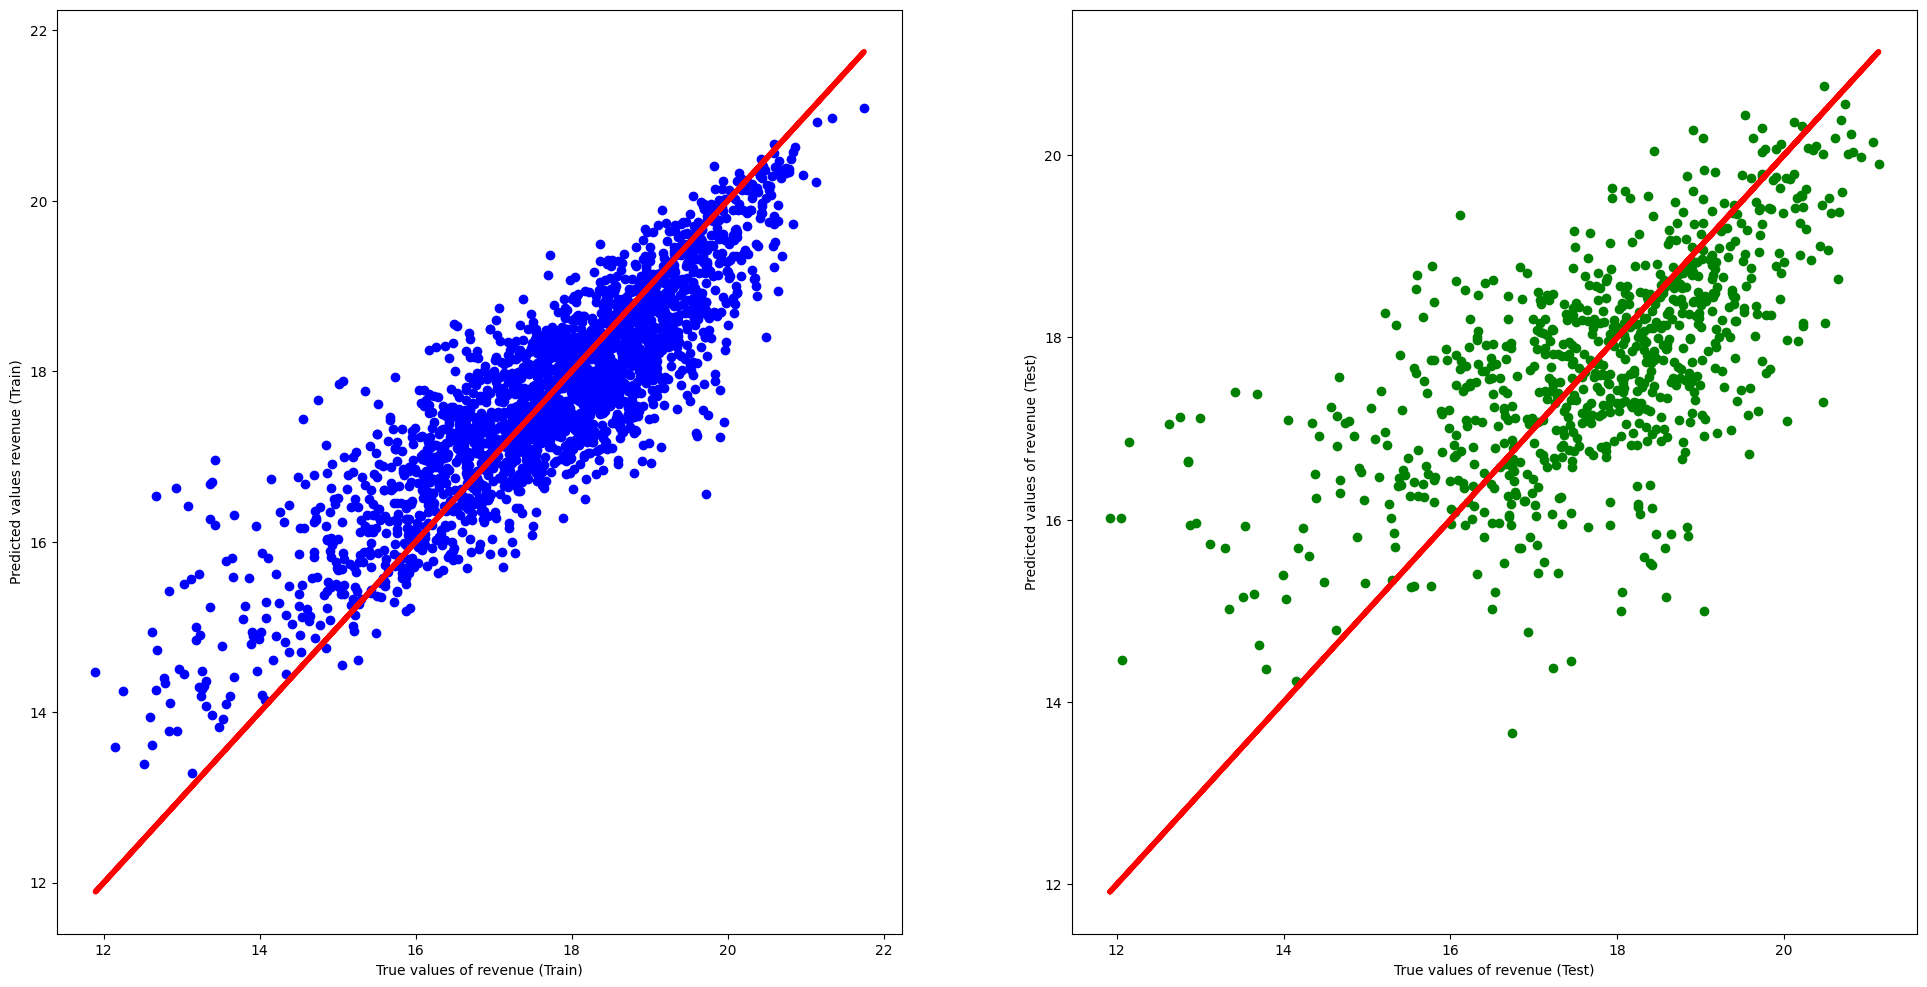

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.744739681438667
Mean Squared Error (MSE) 	: 0.6213419249306414

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4026442394605799
Mean Squared Error (MSE) 	: 1.5656653920055728



In [ ]:
X_train = pd.DataFrame(train[['revenue', 'budget', 'num_crew', 'num_cast']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'budget', 'num_crew', 'num_cast']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])


print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

* What we are doing here includes scattering all points in both Train set (Blue figure) and Test set (Red figure), which are represented by Ground Truth value in the x axis and Predicted Values by XGBoost in the y axis. 
* After scattering, we use a linear Regression Model to plot the red line base on scattered data (As in the figure) to measure the Goodness of Fit, which is R^2 value, of the Model and result yielded from XGBoost.  

* Now, we can see that the performance seems to be improved, but not very significant. There is a formular (model) to predict revenue but there performance is not very high. Therefore, before release, it is hard for the company to predicts the revenue. 

Let's take a look again at the correlation matrix with other post-production elements factor as well.

In [ ]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

documentary      -0.203814
comedy           -0.084991
war              -0.072423
horror           -0.070343
action           -0.067070
crime            -0.057618
drama            -0.031282
mystery          -0.027223
western          -0.005469
family           -0.005327
fantasy          -0.003028
animation         0.009936
adventure         0.095573
vote_average      0.125474
thriller          0.161976
foreign           0.163064
music             0.169485
history           0.195995
sciencefiction    0.261552
num_cast          0.281805
num_crew          0.349295
budget            0.637824
popularity        0.651487
vote_count        0.707363
revenue           1.000000
romance                NaN
tvmovie                NaN
Name: revenue, dtype: float64

We can see that, the correlation is higher on some post-production elements, such as popularity, vote_count. Therefore, it seems to be easier to use post elements to predict the revenue of the movie by some post-production elements.

### Model 3: Regression model base on post-production elements by using Linear Regression

Shape of train set: (2325, 2) (2325, 1)
Shape of test set: (775, 2) (775, 1)
Intercept of Regression 	: b =  [12.64704302]
Coefficients of Regression 	: a =  [[-0.01892498  0.83592672]]



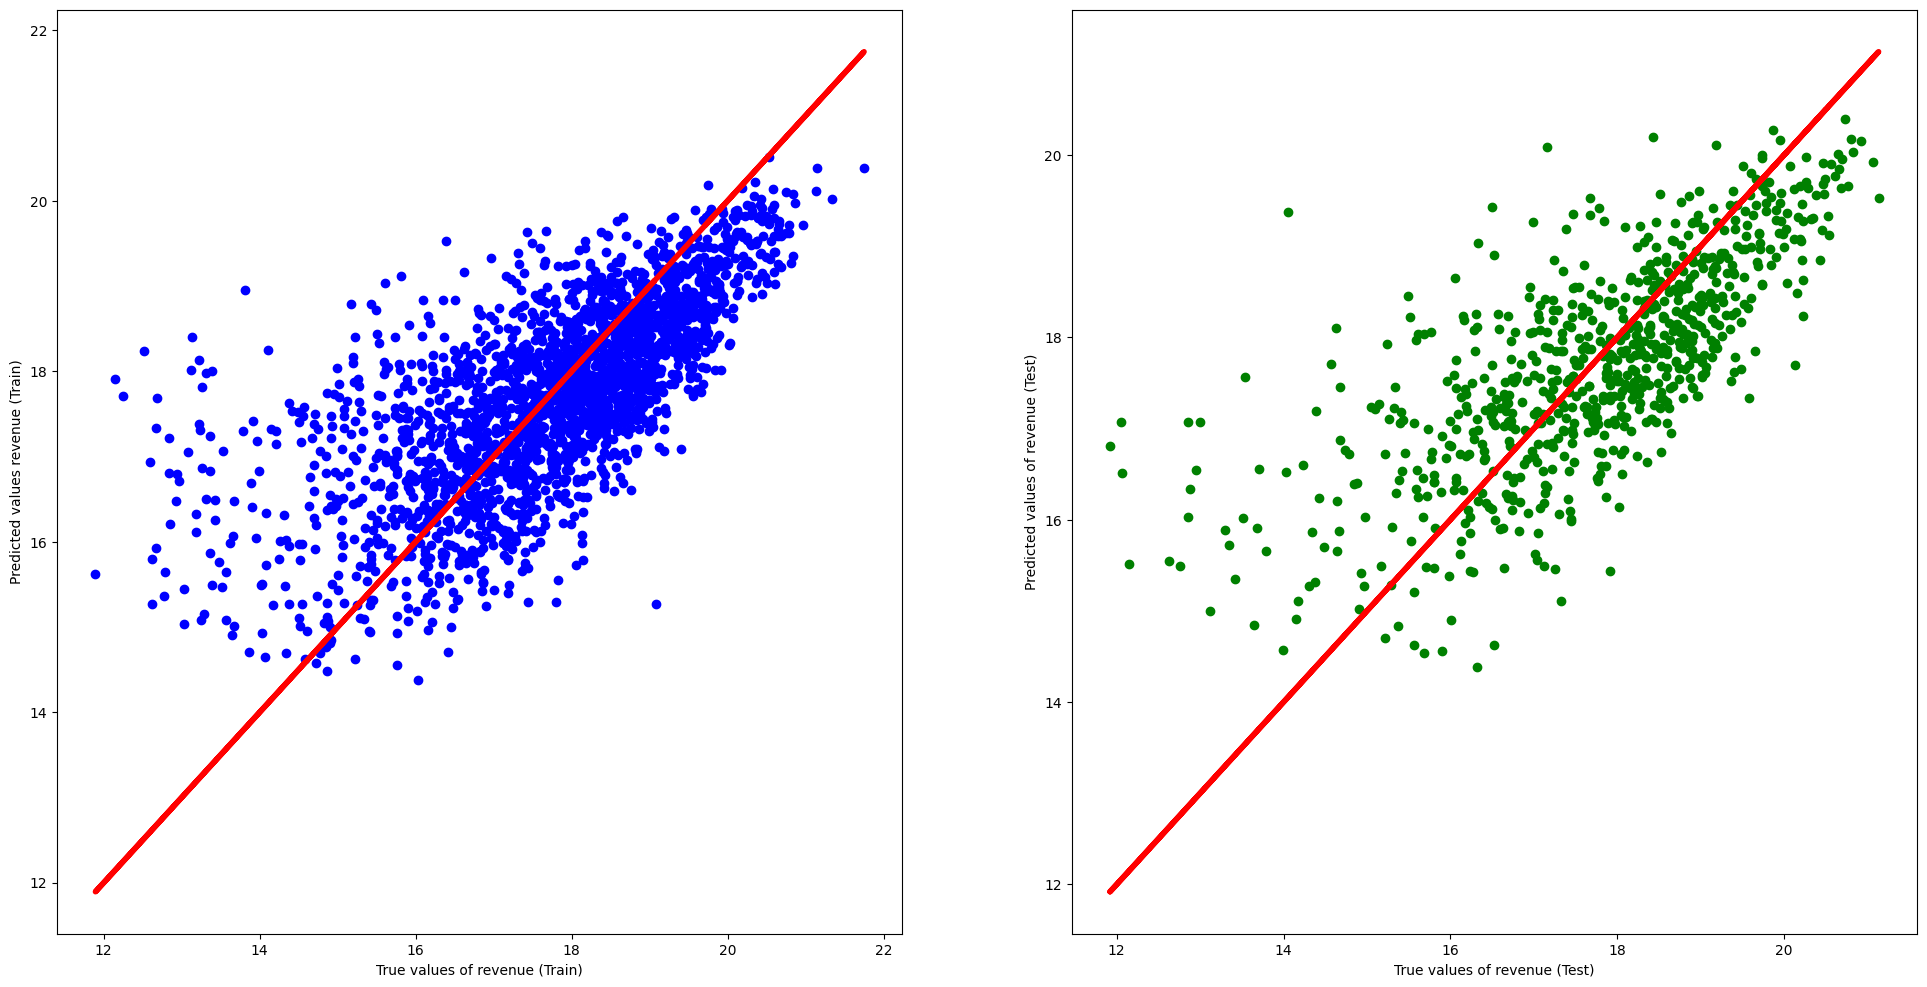

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.491441114305065
Mean Squared Error (MSE) 	: 1.2379086524658875

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.525010975377914
Mean Squared Error (MSE) 	: 1.2449430081024675



In [ ]:
X_train = pd.DataFrame(train[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

There is a slight improvement in the R^2 score for the test set, however with the training set there seems to be less accurate. Hence we move on with using the XgBoost model on post-production elements

### Model 4: Regression model base on post-production elements by using XgBoost

Shape of train set: (2325, 2) (2325, 1)
Shape of test set: (775, 2) (775, 1)


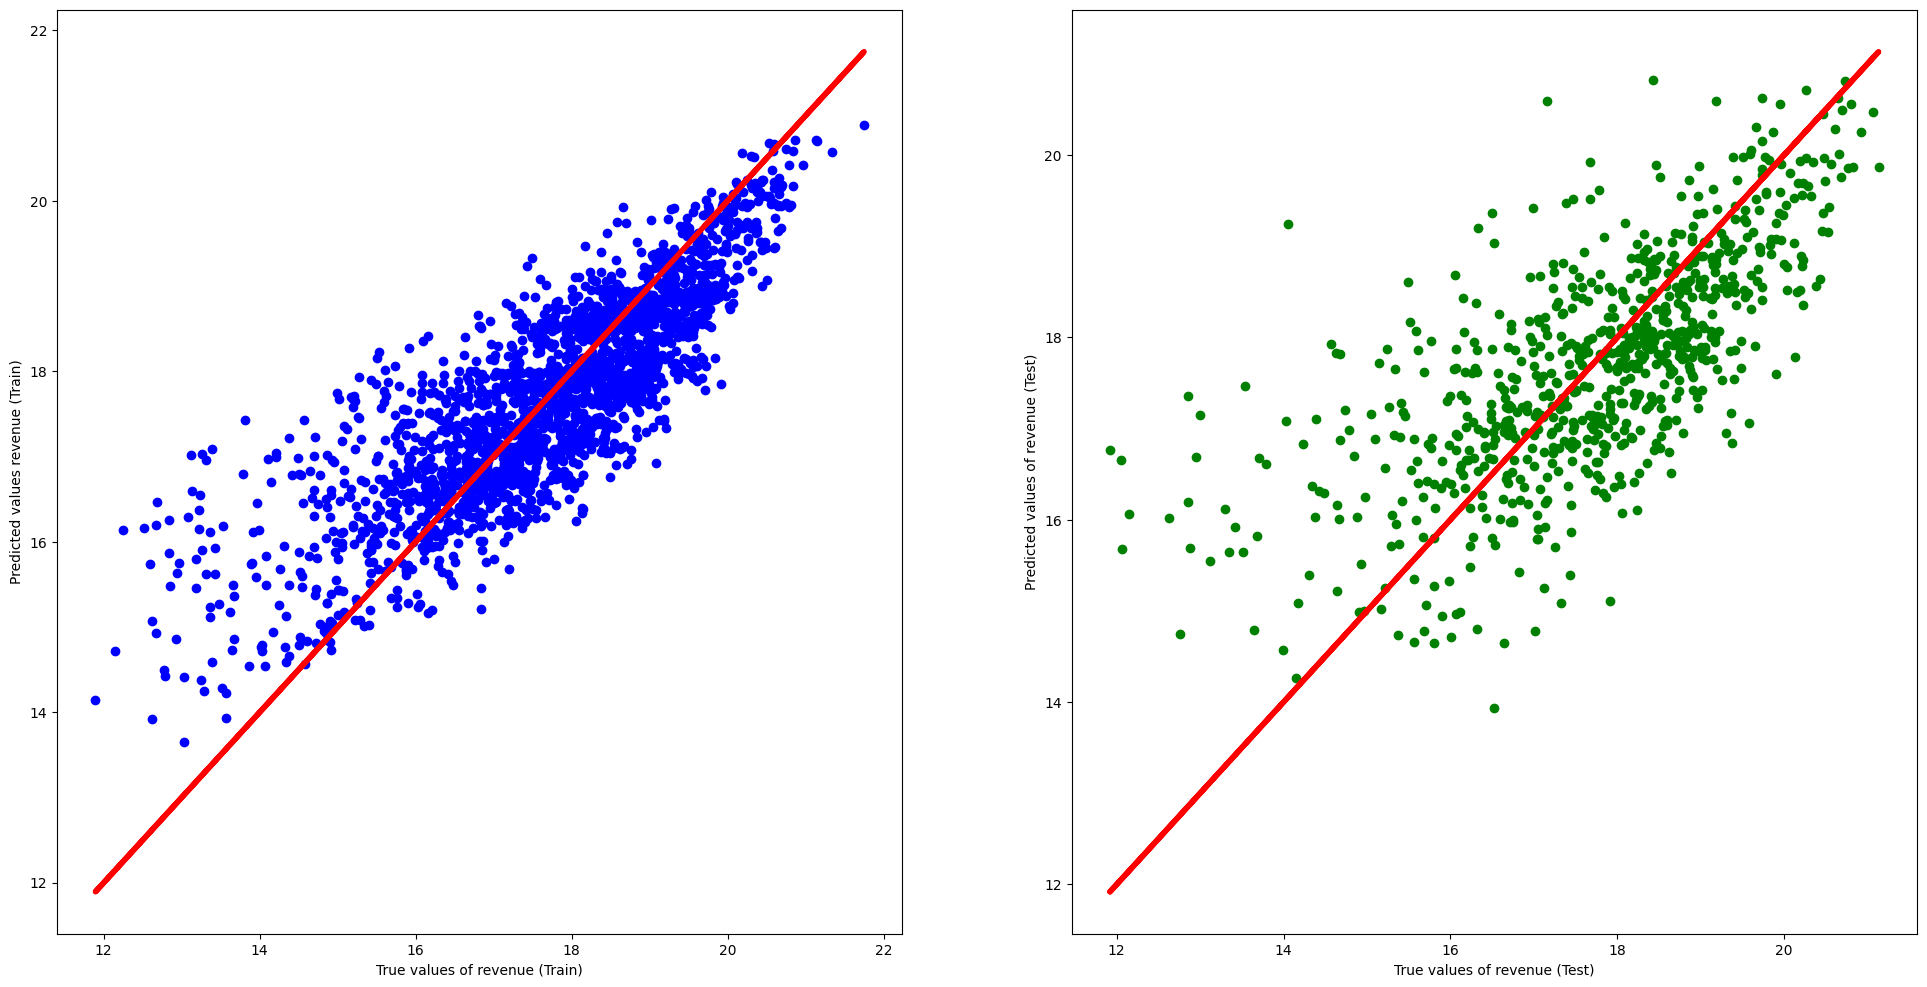

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6848402068755204
Mean Squared Error (MSE) 	: 0.7671462357501346

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.478093311495867
Mean Squared Error (MSE) 	: 1.3679138865410347



In [ ]:
X_train = pd.DataFrame(train[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])


print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

* What we are doing here includes scattering all points in both Train set (Blue figure) and Test set (Red figure), which are represented by Ground Truth value in the x axis and Predicted Values by XGBoost in the y axis. 
* After scattering, we use a linear Regression Model to plot the red line base on scattered data (As in the figure) to measure the Goodness of Fit, which is R^2 value, of the Model and result yielded from XGBoost. 
* The performance seems to be improved. It is easy to observe that post-elements are the parameters of the film's success. Now, let's see if we know all the pre-production elements and post-production elements if the performance can be improved

### Model 5: Predicting revenue base on both pre and post-production elements by using Linear Regression

Shape of train set: (2325, 26) (2325, 1)
Shape of test set: (775, 26) (775, 1)
Intercept of Regression 	: b =  [5.29424185]
Coefficients of Regression 	: a =  [[ 5.03066102e-01  1.51115464e-03 -4.06704820e-04  9.60030164e-02
   1.00600405e-01  2.31415337e-02  6.62848918e-01  3.56972136e-01
   1.35204869e-01 -1.63716248e-01  3.48924933e-01 -3.34457081e-01
   8.32667268e-17 -1.87028367e-01 -7.42344371e-02 -2.77555756e-17
   1.74869491e-01 -1.52881226e-01 -1.60416168e-02 -1.00384310e-01
  -2.89536989e-01 -1.48413702e-01  7.23158216e-03 -4.32293103e-02
   6.49609745e-01  1.11476623e-02]]



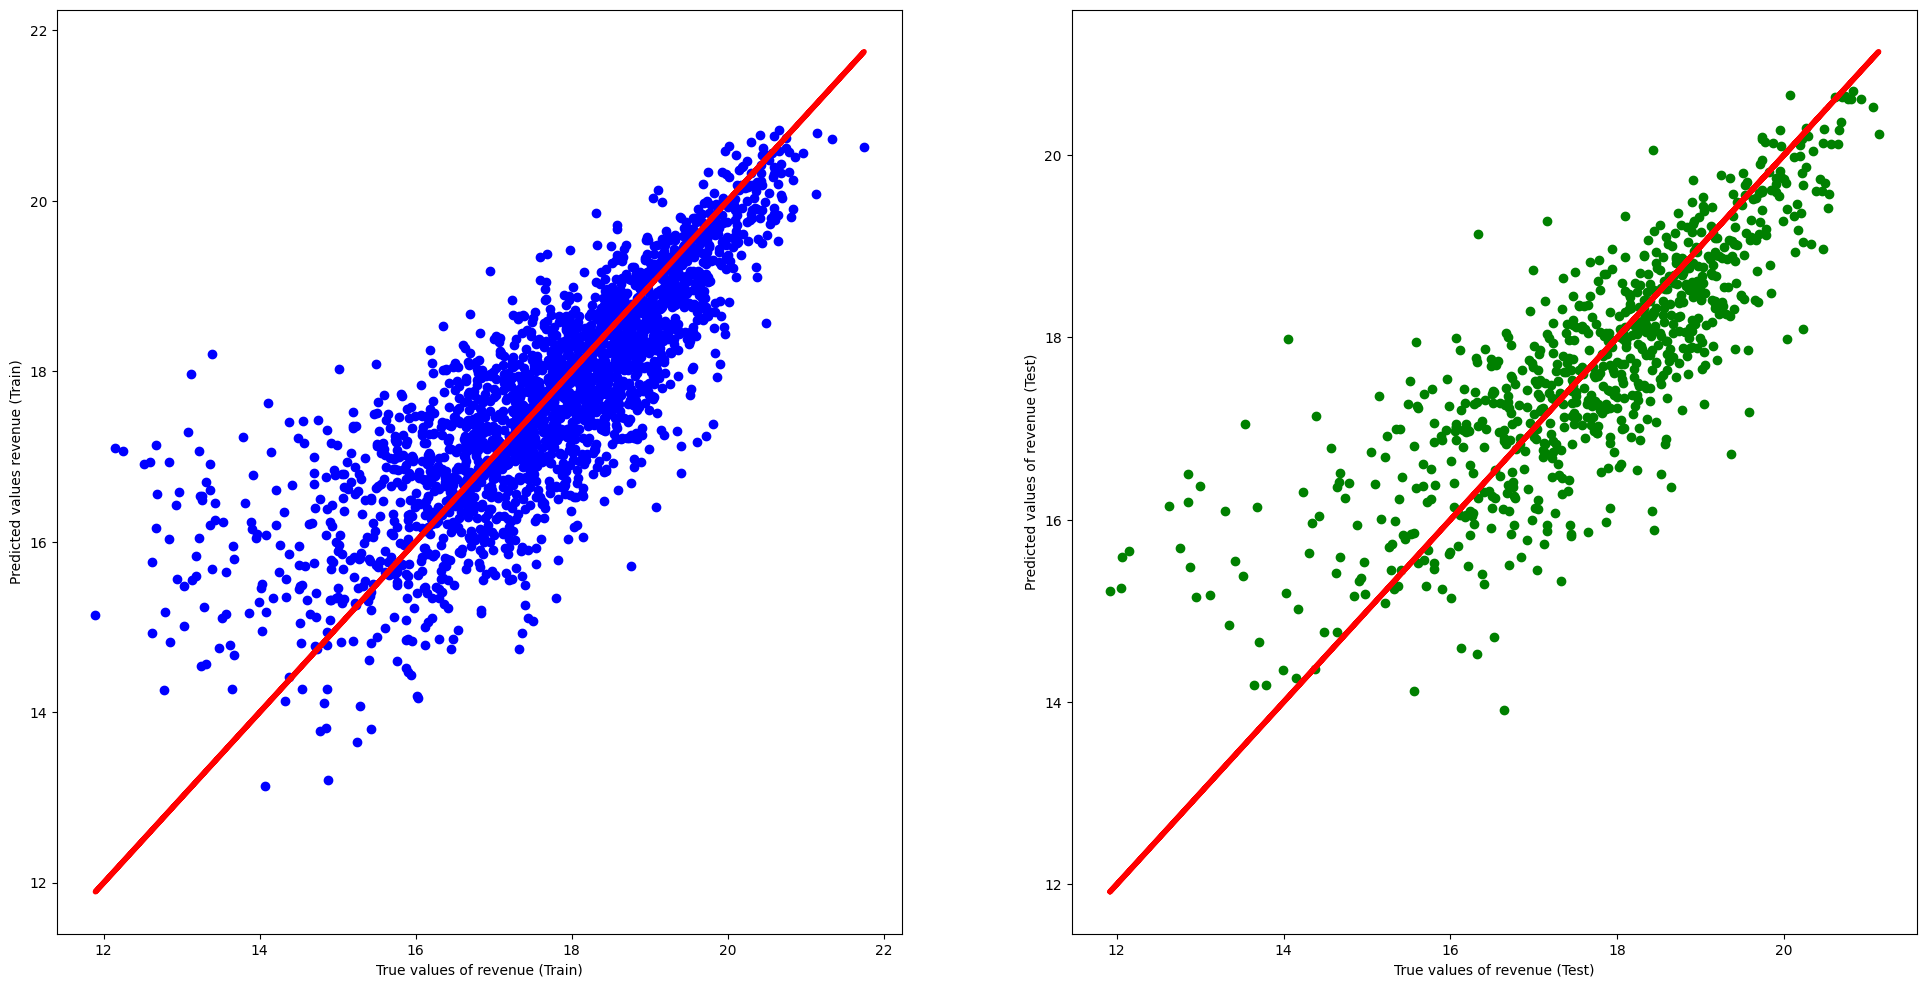

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6480805676433314
Mean Squared Error (MSE) 	: 0.8566247145399991

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6712293906070198
Mean Squared Error (MSE) 	: 0.8617055346889937



In [ ]:
X_train = train.drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = test.drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Model 6: Predicting revenue base on both pre and post-production elements by using XgBoost

Shape of train set: (2325, 26) (2325, 1)
Shape of test set: (775, 26) (775, 1)


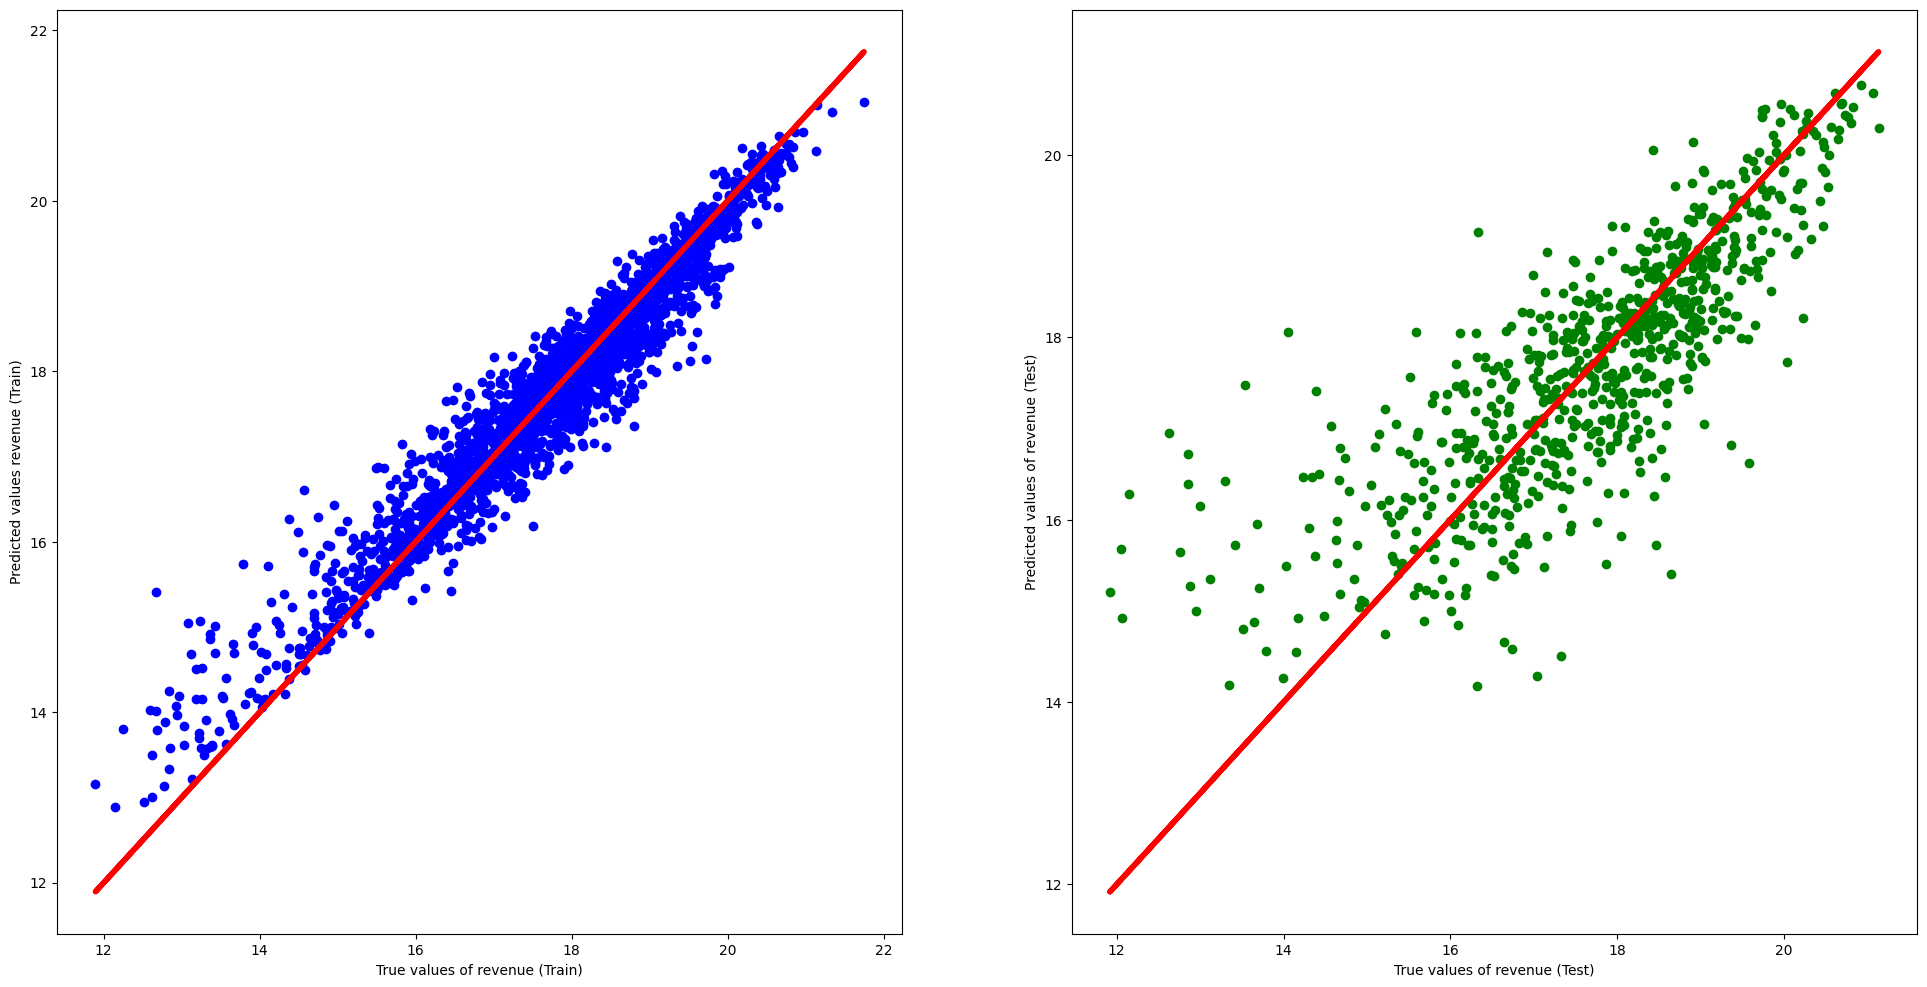

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.926415280141226
Mean Squared Error (MSE) 	: 0.17911625175515447

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6469888011559795
Mean Squared Error (MSE) 	: 0.9252399550334754



In [ ]:
X_train = train.drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = test.drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])

print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

xgb = xgboost.XGBRegressor(n_estimators=150, learning_rate=0.08, reg_lambda=2, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

* What we are doing here includes scattering all points in both Train set (Blue figure) and Test set (Red figure), which are represented by Ground Truth value in the x axis and Predicted Values by XGBoost in the y axis. 
* After scattering, we use a linear Regression Model to plot the red line base on scattered data (As in the figure) to measure the Goodness of Fit, which is R^2 value, of the Model and result yielded from XGBoost. 
+ We can see that, now, the performance of the model is much enhanced, with high R^2 score on both train set and test set.
+ We will fine-tune the model on this dataset (both pre and post production)

# Fine tune XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train = train.drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = test.drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])

params = { 'max_depth': [4,7,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgboost.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train,y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}
Lowest RMSE:  0.9432090032427589


## 7. Bonus: recommendation system base on content

In [ ]:
C= moviesdata['vote_average'].mean()
C

6.092514036182159

In [ ]:
m= moviesdata['vote_count'].quantile(0.9)
m

1842.199999999998

In [ ]:
q_movies = moviesdata.copy().loc[moviesdata['vote_count'] >= m]
q_movies.shape

(481, 43)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1887,The Shawshank Redemption,8205,8.5,8.058576
662,Fight Club,9413,8.3,7.938689
65,The Dark Knight,12002,8.2,7.919564
3237,Pulp Fiction,8428,8.3,7.904036
96,Inception,13752,8.1,7.862848
3342,The Godfather,5893,8.4,7.850454
95,Interstellar,10867,8.1,7.809015
809,Forrest Gump,7927,8.2,7.802587
329,The Lord of the Rings: The Return of the King,8064,8.1,7.726679
1996,The Empire Strikes Back,5879,8.2,7.697175


Text(0.5, 1.0, 'Popular Movies')

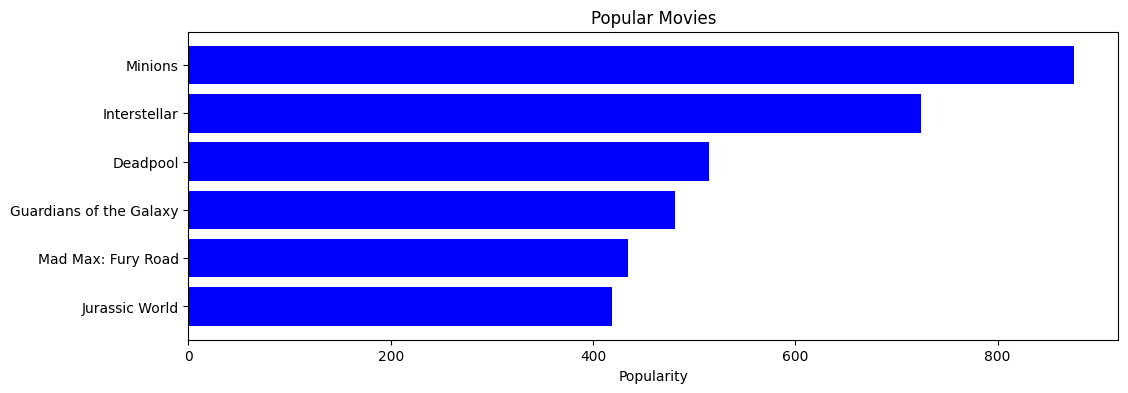

In [ ]:
pop= moviesdata.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
moviesdata['overview'] = moviesdata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(moviesdata['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4809, 20978)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(moviesdata.index, index=moviesdata['title']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return moviesdata['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Avatar')

3609                       Apollo 18
2136                    The American
634                       The Matrix
1344            The Inhabited Island
529                 Tears of the Sun
1616                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2634             Blood and Chocolate
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3149                            Plastic
1721                            Timecop
4131                 This Thing of Ours
3316              Thank You for Smoking
3038                      The Corruptor
588     Wall Street: Money Never Sleeps
2142         Team America: World Police
1474                       The Fountain
1289                        Snowpiercer
Name: title, dtype: object

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    moviesdata[feature] = moviesdata[feature].apply(literal_eval)

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
moviesdata['director'] = moviesdata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    moviesdata[feature] = moviesdata[feature].apply(get_list)

In [ ]:
moviesdata[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    moviesdata[feature] = moviesdata[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
moviesdata['soup'] = moviesdata.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(moviesdata['soup'])
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
moviesdata = moviesdata.reset_index()
indices = pd.Series(moviesdata.index, index=moviesdata['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4644    Amidst the Devil's Wings
1199                The Prestige
3078           Romeo Is Bleeding
3331              Black November
1509                      Takers
1992                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

* It is quite impressive here since in the Title "The Dark Knight Rises", Batman was not even mentioned but in the Recommendation Part, the "Batman Begins" appears as the model knows some deep insight about the movie!

In [ ]:
moviesdata['cast'][65]
#moviesdata['cast'][119]

['christianbale', 'heathledger', 'aaroneckhart']

In [ ]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

## Reference:
Brownlee, Jason. “How to Remove Outliers for Machine Learning.” Machine Learning Mastery, 18 Aug. 2020, machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/.  <br><br>
WillKoehrsen. “WillKoehrsen/Data-Analysis.” GitHub, github.com/WillKoehrsen/Data-Analysis/tree/master/random_forest_explained. <br><br>
Sangeetha, Jame. “Json Parsing & Linear Regression Analysis.” Kaggle, Kaggle, 28 Mar. 2018, www.kaggle.com/sanjames/json-parsing-linear-regression-analysis. <br><br>
F.koglu, et al. “How Can I Increase the Accuracy of My Linear Regression Model?(Machine Learning with Python).” Stack Overflow, 1 Sept. 1966, stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.svm.LinearSVR¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html. <br><br>
Burak Ergenc,"Predictions with XGboost and Linear Regression", https://www.kaggle.com/code/mburakergenc/predictions-with-xgboost-and-linear-regression/notebook<br><br>